# Last.FM
## Final Project - Unsupervised Algorithms in Machine Learning

### Github: https://github.com/VickyH-99/UnsupervisedLearning_FinalProject_LastFMRecommendation

# CONTENT

## 1. Project Overview
- **Background & Motivation**:  
  Online music platforms generate massive user–song interaction data. Understanding user listening behavior is crucial for personalization, user retention, and preventing churn to competitor platforms.  
- **Research Questions**:  
  1. How can we identify user group patterns based on listening habits?  
  2. How can unsupervised learning methods enable personalized recommendation?  
  3. Can matrix factorization reveal latent music factors (styles/themes)?  
- **Objectives**:  
  Apply clustering, collaborative filtering, and matrix factorization to uncover insights and provide actionable value for music platforms.  

---

## 2. Dataset Description
- **Source of data**: Last.fm 1K Users Dataset (Oscar Celma, 2010)  
- **Size**: ~19M interaction records from ~1,000 users, 100k+ artists  
- **Files**:  
  - `userid-timestamp-artid-artname-traid-traname.tsv` → user listening logs  
  - `userid-profile.tsv` → user demographics (gender, age, country, signup date)  
- **Features available**:  
  - User ID, Artist ID & Name, Track ID & Name, Timestamp  
  - User demographics: gender, age, country, signup date  
- **Data characteristics**:  
  - Implicit feedback (no explicit ratings/playtime, only listening history)  
  - Sparse user–track matrix with long-tail distribution (few popular songs, many rare songs)  
  - Heterogeneous features (IDs, categorical, text, time)  
- **Initial thoughts**:  
  Rich dataset for clustering, recommendation, and matrix decomposition, though sparsity and lack of explicit ratings require careful handling.  

---

## 3. Data Loading & Initial Cleaning
**Goal:** Load the raw TSV files, inspect schema, and perform minimal cleaning so the dataset is ready for EDA.  
- Drop irrelevant or index columns  
- Encode user/artist/track IDs  
- Convert date + time → timestamp  
- Aggregate (user, track) counts as play frequency  

---

## 4. Exploratory Data Analysis (EDA)
Explore the dataset to identify patterns, anomalies, and potential insights:  
- Data quality checks (missing values, duplicates)  
- User activity distribution (top vs bottom users, listening diversity)  
- Artist & track popularity distribution (long-tail effect)  
- Demographics overview (gender, age, country)  
- Temporal analysis (daily/weekly/hourly listening trends)  
- User–track matrix sparsity visualization  
- EDA summary  

---

## 5. Unsupervised Learning Methods

### 5.1 Clustering  
- User clustering (KMeans + PCA/t-SNE visualization)  
- Artist/track clustering (based on listening co-occurrence or tags)  

### 5.2 Recommendation Systems  
- Baseline recommendation (most popular songs)  
- User-based collaborative filtering  
- Item-based collaborative filtering  

### 5.3 Matrix Factorization  
- Singular Value Decomposition (SVD)  
- Non-negative Matrix Factorization (NMF)  
- Top-N recommendation results  

### 5.4 Extension Methods (Highlights)  
- PCA / t-SNE for visualization of user/song embeddings  
- LDA topic modeling for music style discovery (based on artist/track tags if available)  

---

## 6. Model Evaluation & Results
- Clustering evaluation (Silhouette Score, visualization-based insights)  
- Recommendation evaluation (Precision@K, Recall@K, NDCG)  
- Matrix factorization evaluation (reconstruction error, RMSE)  
- Comparative summary of methods  

---

## 7. Practical Insights & Applications
- User group patterns & profiles
- Personalization strategies
- Latent music themes
- Platform applications

---

## 8. Conclusion & Future Work
- Recap of research questions and answers
- Summary of main findings
- Limitations of dataset
- Future directions

---

## 9. References
- Dataset
- Courses and Online Resources
- Textbooks
- Research Papers

---

## 1. Project Overview

**Background & Motivation**  
Music platforms thrive on personalization. By understanding how users consume music and identifying groups with similar listening habits, platforms can deliver more relevant recommendations, boost engagement (DAU/MAU), and reduce churn to competing apps.

**Problem Definition (Unsupervised Setting)**  
Unlike explicit rating datasets (e.g., 1–5 stars), Last.fm provides only implicit feedback: user–track interaction logs (listening events).  
This project frames the task as an **unsupervised learning problem** with three main goals:  
1. Discover user group patterns from listening habits.  
2. Build practical unsupervised recommenders without explicit ratings.  
3. Reveal latent music themes (styles/genres) via matrix factorization.

**Research Questions**  
1. How can we identify user group patterns from large-scale listening histories?  
2. How can unsupervised learning methods be used to deliver personalized recommendations?  
3. Can matrix factorization uncover latent factors (styles/themes) that explain music preferences?

**Objectives**  
- Apply **clustering**, **collaborative filtering**, and **matrix factorization** to model user–track interactions.  
- Use **PCA/t-SNE** to visualize embeddings of users and tracks.  
- Apply **LDA topic modeling** (on tags/metadata) to extract interpretable music topics.  
- Translate results into actionable strategies for music platforms to improve personalization and reduce churn.

**Scope & Deliverables**  
- One comprehensive Jupyter Notebook covering the pipeline:  
  *EDA → Clustering → Recommendation → Matrix Factorization → Extensions*.  
- Offline evaluation metrics:  
  - **Clustering**: Silhouette score + visualization.  
  - **Recommendation**: Precision@K, Recall@K, NDCG (vs. popularity baseline).  
  - **Matrix Factorization**: Reconstruction error (RMSE).  
- Demonstrative outputs:  
  - Top-N recommendations for sample users.  
  - Visual maps of user/song clusters.  
  - Example latent topics/themes.


---

## 2. Dataset Description

**Source**  
- [Last.fm 1K Users Dataset (Oscar Celma, 2010)](http://ocelma.net/MusicRecommendationDataset/lastfm-1K.html)  
- [GitHub mirror](https://github.com/eifuentes/lastfm-dataset-1K)  

This dataset contains the complete listening histories of nearly **1,000 users** collected from the Last.fm API (`user.getRecentTracks`), with logs up to May 2009.  
Total size is about **19M interaction records**, covering over **100k artists**.

---

**Raw Files & Fields**  

- `userid-timestamp-artid-artname-traid-traname.tsv` (listening logs):  
  - `userid` — anonymized user identifier  
  - `timestamp` — UTC time of listening event  
  - `artist_id` — MusicBrainz artist ID  
  - `artist_name` — artist name  
  - `track_id` — MusicBrainz track ID  
  - `track_name` — track title  

- `userid-profile.tsv` (user metadata):  
  - `userid` — anonymized user identifier  
  - `gender` — (m / f / empty)  
  - `age` — user age (int / empty)  
  - `country` — user country  
  - `signup` — account creation date  

---

**Derived Fields (created in this project)**  
- `user_id`, `artist_id_enc`, `track_id_enc` — integer encodings for efficient modeling  
- `play_count` — aggregated count of (user, track) events  
- `date`, `time` — parsed components from timestamp  

---

**Data Characteristics**  
- **Implicit feedback only**: no explicit ratings, just listening events.  
- **Extreme sparsity**: user–track matrix is very sparse, dominated by a few popular tracks while most are rarely played (long-tail distribution).  
- **Heterogeneous information**:  
  - User demographics (age, gender, country)  
  - Listening sequences (timestamp)  
  - Music metadata (artist, track)  

---

**Implications for Modeling**  
- Collaborative filtering and matrix factorization are natural approaches for this kind of implicit data.  
- Filtering (active users / popular tracks) improves density and reduces noise.  
- Tags and metadata enable richer analyses: topic modeling (LDA), hybrid recommenders combining collaborative + content signals.  

---

### 3. Data Loading & Initial Cleaning

**Goals:**

- Environment Setup
- Load and inspect raw TSV files
- Drop irrelevant or index columns
- Encode user/track IDs
- Convert date fields into timestamps
- Aggregate user–track play counts



In [1]:
# === Optional: install missing packages ===
# Core
# !pip install -U numpy scipy pandas scikit-learn matplotlib seaborn

# Recommender systems
# !pip install -U implicit scikit-surprise

# NLP / Topic modeling
#  !pip install -U gensim

# Gradient boosting (for comparison, optional)
# !pip install -U lightgbm xgboost catboost

# Explainability (optional)
# !pip install -U shap

# Visualization
# !pip install -U wordcloud umap-learn

In [2]:
# # === Environment Setup & Imports ===
# import os, gc, warnings, datetime
# warnings.filterwarnings("ignore")

# # Core
# import numpy as np
# import pandas as pd

# # Visualization
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(style="whitegrid", palette="muted", font_scale=1.1)
# pd.set_option("display.max_columns", 200)

# # Sparse / utils
# from scipy.sparse import csr_matrix

# # ML – preprocessing / decomposition / clustering / metrics
# from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
# from sklearn.decomposition import PCA, TruncatedSVD, NMF
# from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE
# from sklearn.metrics import silhouette_score

# # Recommender libraries (optional)
# try:
#     import implicit  # ALS / BPR for implicit feedback
#     HAS_IMPLICIT = True
# except Exception:
#     HAS_IMPLICIT = False

# try:
#     from surprise import Dataset as SurpriseDataset, Reader, SVD as SurpriseSVD
#     from surprise import NMF as SurpriseNMF, KNNBasic
#     from surprise.model_selection import train_test_split as surprise_train_test_split
#     from surprise import accuracy as surprise_accuracy
#     HAS_SURPRISE = True
# except Exception:
#     HAS_SURPRISE = False

# # NLP / topic modeling (for tags/metadata, later)
# try:
#     import gensim
#     from gensim import corpora
#     HAS_GENSIM = True
# except Exception:
#     HAS_GENSIM = False

# print("Imports ready.",
#       f"implicit={HAS_IMPLICIT}", f"surprise={HAS_SURPRISE}", f"gensim={HAS_GENSIM}")

In [3]:
# === Data Loading & Initial Cleaning ===

import os, gc
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix

# File paths
DATA_DIR = r"D:/AI/CU-AI/unsupervised learning/lastfm-dataset-1K"
INTER_FILE = "userid-timestamp-artid-artname-traid-traname.tsv"
PROFILE_FILE = "userid-profile.tsv"
INTER_PATH = os.path.join(DATA_DIR, INTER_FILE)
PROF_PATH = os.path.join(DATA_DIR, PROFILE_FILE)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# ---- Load user profiles ----
profiles = pd.read_csv(
    PROF_PATH,
    sep="\t",
    header=0,
    dtype={"userid": "string"},
    low_memory=False
)
profiles["age"] = pd.to_numeric(profiles["age"], errors="coerce")

print("Profiles shape:", profiles.shape)
display(profiles.head())

Profiles shape: (992, 5)


,#id,gender,age,country,registered
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"


In [5]:
# ---- Load interactions in chunks ----
COLS = ["userid", "timestamp", "artist_id", "artist_name", "track_id", "track_name"]
parts = []

for chunk in pd.read_csv(
    INTER_PATH,
    sep="\t",
    header=None,
    names=COLS,
    usecols=["userid", "track_id"],
    dtype={"userid": "string", "track_id": "string"},
    chunksize=1_000_000,
    low_memory=True
):
    agg = chunk.groupby(["userid", "track_id"]).size().reset_index(name="play_count")
    parts.append(agg)

interaction = pd.concat(parts, ignore_index=True)
interaction = interaction.groupby(["userid", "track_id"], as_index=False)["play_count"].sum()
gc.collect()

print("Interaction table:", interaction.shape)
display(interaction.head())

Interaction table: (3957807, 3)


,userid,track_id,play_count
0,user_000001,00237585-8e04-4cd5-a785-f2185492ab0b,2
1,user_000001,0024d72c-136f-49f2-9078-ce4b39b94d3f,4
2,user_000001,0025055f-39c3-43e2-b874-3bf42bbc9212,2
3,user_000001,002e254d-4624-49f4-b78a-b40711b9e4f3,3
4,user_000001,00b07689-ec4c-4773-94ce-06f3d198431e,4


In [6]:
# ---- Encode IDs & build sparse matrix ----
u_enc, i_enc = LabelEncoder(), LabelEncoder()
interaction["user_id"] = u_enc.fit_transform(interaction["userid"])
interaction["item_id"] = i_enc.fit_transform(interaction["track_id"])

R = csr_matrix(
    (interaction["play_count"].astype(np.float32),
     (interaction["user_id"], interaction["item_id"]))
)

n_users, n_items = R.shape
nnz = R.nnz
sparsity = 100 * (1 - nnz / (n_users * n_items + 1e-9))

print(f"User-Item matrix: {R.shape}, nnz={nnz}, sparsity={sparsity:.2f}%")


User-Item matrix: (992, 960402), nnz=3957807, sparsity=99.58%


## 4. Exploratory Data Analysis (EDA)

**Goals:**
- Perform data quality checks (missing values, duplicates)
- Explore user activity distribution (play counts per user)
- Analyze track popularity distribution (long-tail effect)
- Summarize user demographics (gender, age, country)
- Visualize user–track matrix sparsity
- Perform word frequency analysis on track names (unigrams, bigrams, word cloud)

The purpose of this section is to gain insights into listening behaviors, dataset sparsity, and feature distributions, which will guide later clustering and recommendation system design.


Profiles missing values:
 #id             0
gender        108
age           706
country        85
registered      8
dtype: int64
Interaction missing values:
 userid        0
track_id      0
play_count    0
user_id       0
item_id       0
dtype: int64
Duplicate rows in profiles: 0
Duplicate rows in interaction: 0


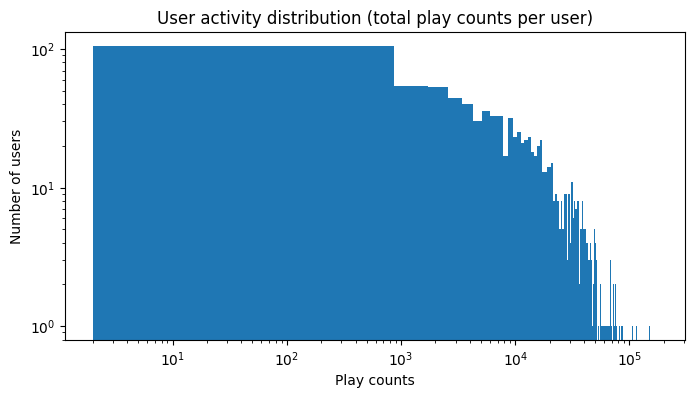

In [7]:
# === 4. Exploratory Data Analysis (EDA) ===

import matplotlib.pyplot as plt
import seaborn as sns

# ---- Data quality checks ----
print("Profiles missing values:\n", profiles.isna().sum())
print("Interaction missing values:\n", interaction.isna().sum())

# Check duplicates
print("Duplicate rows in profiles:", profiles.duplicated().sum())
print("Duplicate rows in interaction:", interaction.duplicated().sum())

# --- User activity distribution ---
user_activity = interaction.groupby("userid")["play_count"].sum()

plt.figure(figsize=(8,4))
plt.hist(user_activity, bins=200, log=True)   # log on y-axis
plt.xscale("log")                             # log on x-axis
plt.title("User activity distribution (total play counts per user)")
plt.xlabel("Play counts")
plt.ylabel("Number of users")
plt.show()

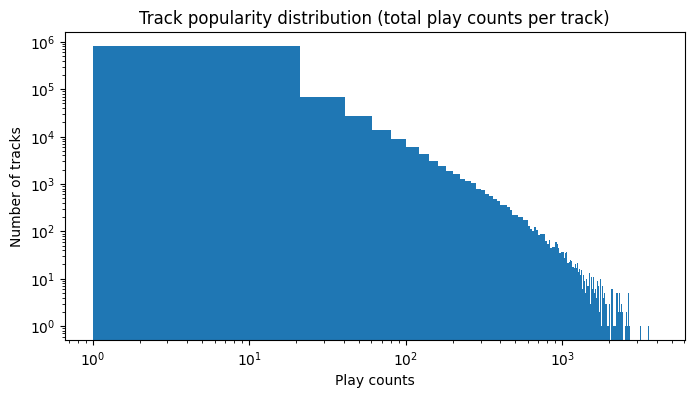

In [8]:
# --- Track popularity distribution ---
track_popularity = interaction.groupby("track_id")["play_count"].sum()

plt.figure(figsize=(8,4))
plt.hist(track_popularity, bins=200, log=True)   # log on y-axis
plt.xscale("log")                                # log on x-axis
plt.title("Track popularity distribution (total play counts per track)")
plt.xlabel("Play counts")
plt.ylabel("Number of tracks")
plt.show()

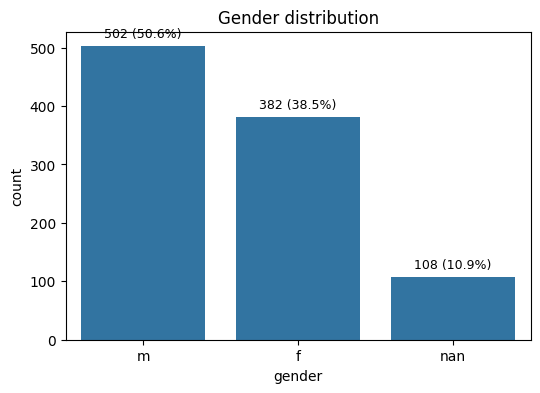

In [9]:
# --- Gender bar with value labels (+ optional percentage) ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ax = plt.figure(figsize=(6,4)).gca()
g_counts = profiles['gender'].value_counts(dropna=False)  # keep NaN if you want
sns.barplot(x=g_counts.index.astype(str), y=g_counts.values, ax=ax)
ax.set_title("Gender distribution")
ax.set_xlabel("gender")
ax.set_ylabel("count")

total_users = len(profiles)
for p in ax.patches:
    value = int(p.get_height())
    pct = value / total_users * 100
    ax.annotate(f"{value} ({pct:.1f}%)",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 4), textcoords='offset points')
plt.show()



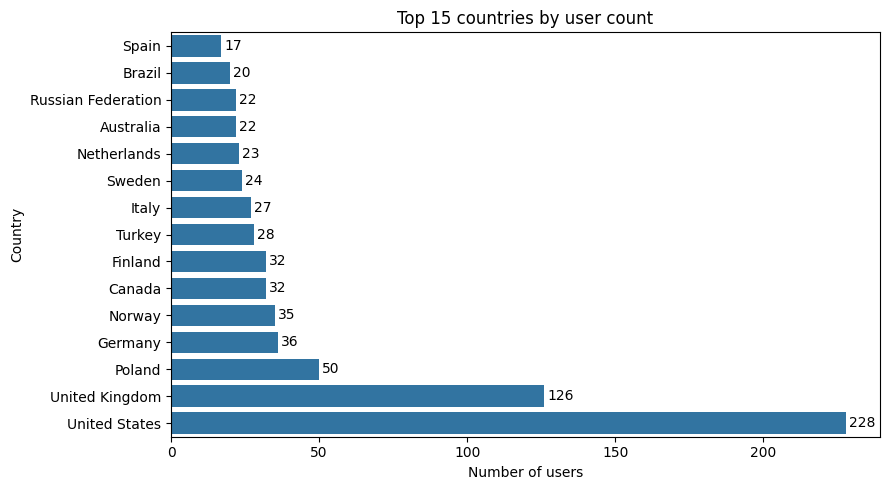

In [10]:
# --- Top 15 countries with value labels ---
ax = plt.figure(figsize=(9,5)).gca()
top_countries = profiles['country'].value_counts().head(15).sort_values(ascending=True)
sns.barplot(x=top_countries.values, y=top_countries.index, ax=ax)
ax.set_title("Top 15 countries by user count")
ax.set_xlabel("Number of users")
ax.set_ylabel("Country")

for i, v in enumerate(top_countries.values):
    ax.text(v + 1, i, str(int(v)), va='center')  # +1 for a little padding
plt.tight_layout()
plt.show()


In [11]:
# --- Overall sparsity stats ---
n_users, n_items = R.shape
nnz = R.nnz
sparsity = 1 - (nnz / (n_users * n_items + 1e-9))
print(f"User-Item matrix: shape={R.shape}, nnz={nnz:,}, sparsity={sparsity:.4%}")


User-Item matrix: shape=(992, 960402), nnz=3,957,807, sparsity=99.5846%


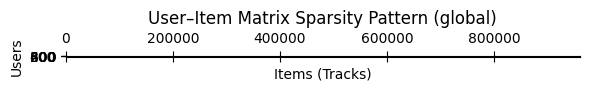

In [12]:
plt.figure(figsize=(6,6))
plt.spy(R, markersize=0.3)
plt.title("User–Item Matrix Sparsity Pattern (global)")
plt.xlabel("Items (Tracks)")
plt.ylabel("Users")
plt.tight_layout()
plt.show()


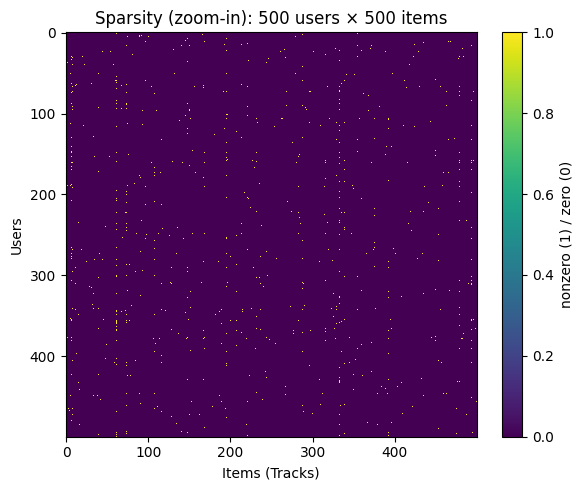

In [13]:
# --- Zoomed-in sample block (e.g., first 500 users × 500 items) ---
# NOTE: .tocsc() / .tocsr() for safe slicing on sparse matrices
R_csr = R.tocsr()
sample_users = min(500, R_csr.shape[0])
sample_items = min(500, R_csr.shape[1])

R_small = R_csr[:sample_users, :sample_items].toarray()  # small enough to densify for heatmap
plt.figure(figsize=(6,5))
plt.imshow((R_small > 0), aspect='auto', interpolation='nearest')
plt.title(f"Sparsity (zoom-in): {sample_users} users × {sample_items} items")
plt.xlabel("Items (Tracks)")
plt.ylabel("Users")
plt.colorbar(label="nonzero (1) / zero (0)")
plt.tight_layout()
plt.show()


Filtered matrix: shape=(953, 66261), nnz=1,839,473, sparsity=97.09% (users≥200, items≥50)


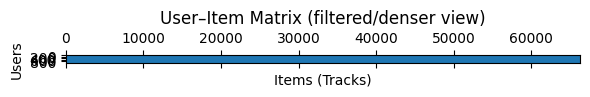

In [14]:
# --- “Filtered dense view”: keep active users & popular items to show denser regions ---
import numpy as np
from scipy.sparse import csr_matrix

min_user_plays = 200     # tune these thresholds to taste
min_item_plays = 50

user_totals = np.array(R_csr.sum(axis=1)).ravel()
item_totals = np.array(R_csr.sum(axis=0)).ravel()

active_user_idx = np.where(user_totals >= min_user_plays)[0]
popular_item_idx = np.where(item_totals >= min_item_plays)[0]

R_filtered = R_csr[active_user_idx][:, popular_item_idx]

n_users_f, n_items_f = R_filtered.shape
nnz_f = R_filtered.nnz
sparsity_f = 1 - (nnz_f / (n_users_f * n_items_f + 1e-9))
print(f"Filtered matrix: shape={R_filtered.shape}, nnz={nnz_f:,}, sparsity={sparsity_f:.2%} "
      f"(users≥{min_user_plays}, items≥{min_item_plays})")

plt.figure(figsize=(6,6))
plt.spy(R_filtered, markersize=0.6)
plt.title("User–Item Matrix (filtered/denser view)")
plt.xlabel("Items (Tracks)")
plt.ylabel("Users")
plt.tight_layout()
plt.show()


In [16]:
# # --- Build track_id -> track_name mapping ---
# track_map = pd.read_csv(
#     INTER_PATH,
#     sep="\t",
#     header=None,
#     names=["userid", "timestamp", "artist_id", "artist_name", "track_id", "track_name"],
#     usecols=["track_id", "track_name"], 
#     dtype=str
# ).drop_duplicates("track_id")

# # --- Merge track_name into interaction ---
# interaction = interaction.merge(track_map, on="track_id", how="left")
# print(interaction.head()) 

# --- Precompute tokens, unigrams, bigrams ---

import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 1) corpus
names = interaction["track_name"].dropna().astype(str).str.lower().tolist()
text = " ".join(names)

# 2) stopwords: sklearn english + music metadata words
music_sw = {
    "feat","featuring","ft","remix","mix","edit","version","radio","club","live",
    "original","remastered","single","bonus","demo","acoustic","instrumental",
    "pt","vol","deluxe","from","soundtrack","ost","intro","outro"
}
stopwords = set(ENGLISH_STOP_WORDS) | music_sw

# 3) tokenize
tokens = re.findall(r"[a-z]+", text)
tokens = [t for t in tokens if len(t) >= 3 and t not in stopwords]

# 4) unigrams
uni_freq = Counter(tokens)
top20_uni = uni_freq.most_common(20)
print("Top 20 words:", top20_uni)

# 5) bigrams
bigrams = []
for s in names:
    toks = [t for t in re.findall(r"[a-z]+", s)
            if len(t) >= 3 and t not in stopwords]
    bigrams += list(zip(toks, toks[1:]))
bi_freq = Counter(bigrams)
top20_bi = bi_freq.most_common(20)
print("Top 20 bigrams:", top20_bi)

        userid                              track_id  play_count  user_id  \
0  user_000001  00237585-8e04-4cd5-a785-f2185492ab0b           2        0   
1  user_000001  0024d72c-136f-49f2-9078-ce4b39b94d3f           4        0   
2  user_000001  0025055f-39c3-43e2-b874-3bf42bbc9212           2        0   
3  user_000001  002e254d-4624-49f4-b78a-b40711b9e4f3           3        0   
4  user_000001  00b07689-ec4c-4773-94ce-06f3d198431e           4        0   

   item_id                        track_name  
0      521                   Monday Nightcap  
1      549              Something In The Way  
2      551  Squeeze Me (Feat. Ben Westbeech)  
3      690                             Tak 4  
4     2592                        Wanderlust  
Top 20 words: [('love', 96412), ('don', 42850), ('song', 37041), ('time', 35584), ('man', 34083), ('like', 30292), ('world', 27853), ('day', 27727), ('life', 26637), ('night', 25623), ('girl', 25363), ('let', 23231), ('black', 23026), ('heart', 22230), ('

Top 20 bigrams: [(('rock', 'roll'), 5249), (('don', 'know'), 3324), (('new', 'york'), 3168), (('just', 'like'), 2344), (('love', 'song'), 2311), (('don', 'want'), 2079), (('don', 'let'), 1971), (('don', 'stop'), 1604), (('far', 'away'), 1556), (('feel', 'like'), 1300), (('brand', 'new'), 1242), (('feel', 'good'), 1240), (('come', 'home'), 1231), (('say', 'goodbye'), 1219), (('saturday', 'night'), 1159), (('don', 'wanna'), 1145), (('good', 'times'), 1134), (('good', 'morning'), 1124), (('love', 'like'), 1075), (('don', 'care'), 1069)]


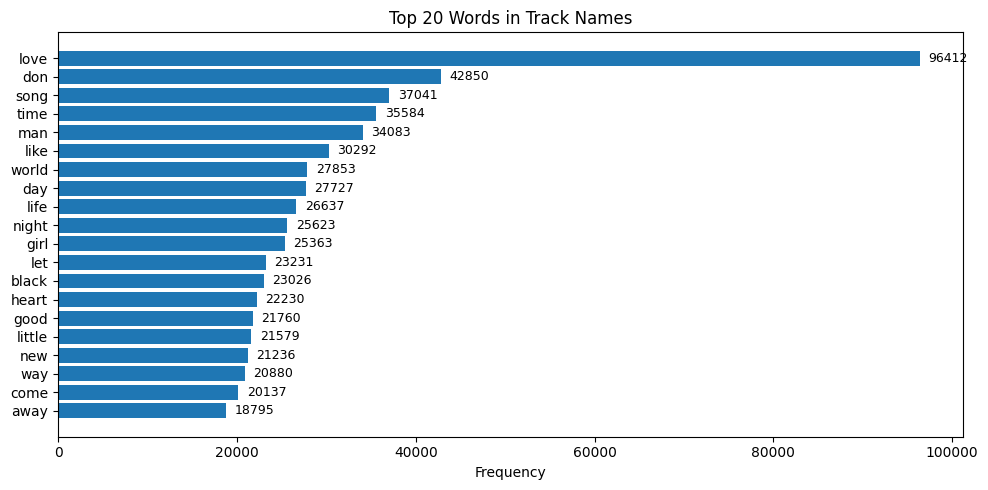

In [17]:
# 5) bigrams (pairs of adjacent tokens)
bigrams = []
for s in names:
    toks = [t for t in re.findall(r"[a-z]+", s)
            if len(t) >= 3 and t not in stopwords]
    bigrams += list(zip(toks, toks[1:]))
bi_freq = Counter(bigrams)
top20_bi = bi_freq.most_common(20)
print("Top 20 bigrams:", top20_bi)


# 6) bar chart: unigrams
if top20_uni:
    words, counts = zip(*top20_uni)
    plt.figure(figsize=(10,5))
    bars = plt.barh(range(len(words)), counts)
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency"); plt.title("Top 20 Words in Track Names")
    for i, b in enumerate(bars):
        plt.text(b.get_width()+max(counts)*0.01, b.get_y()+b.get_height()/2,
                 str(counts[i]), va="center", fontsize=9)
    plt.tight_layout(); plt.show()


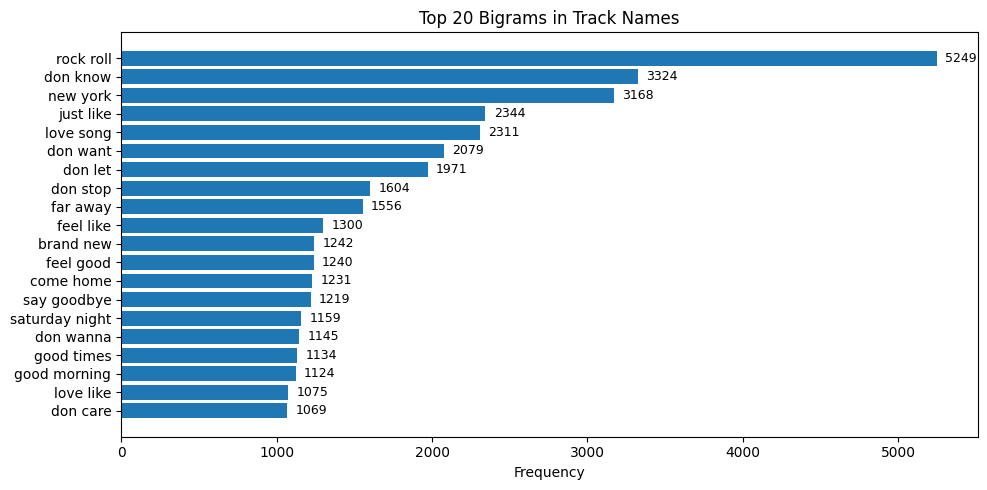

In [18]:

# 7) bar chart: bigrams
if top20_bi:
    phrases = [" ".join(p) for p,_ in top20_bi]
    counts = [c for _,c in top20_bi]
    plt.figure(figsize=(10,5))
    bars = plt.barh(range(len(phrases)), counts)
    plt.yticks(range(len(phrases)), phrases)
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency"); plt.title("Top 20 Bigrams in Track Names")
    for i, b in enumerate(bars):
        plt.text(b.get_width()+max(counts)*0.01, b.get_y()+b.get_height()/2,
                 str(counts[i]), va="center", fontsize=9)
    plt.tight_layout(); plt.show()

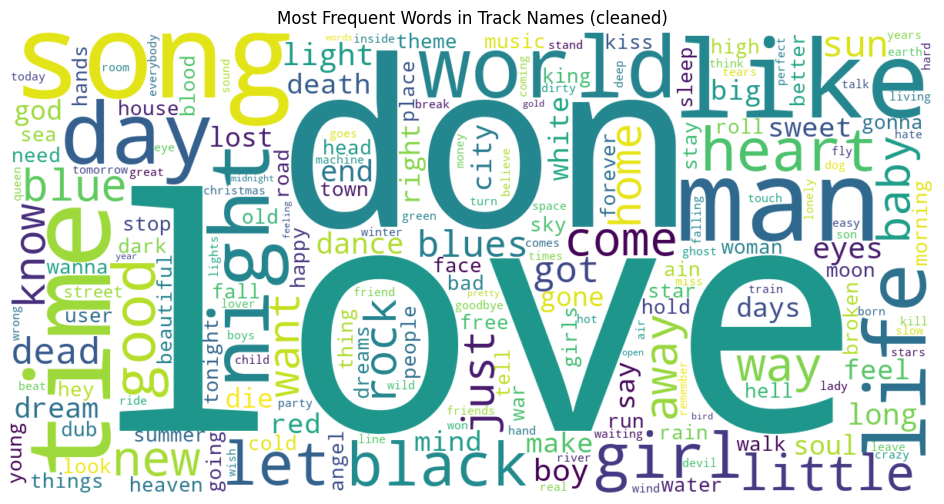

In [19]:
# 8) WordCloud based on cleaned unigram frequencies
if uni_freq:
    wc = WordCloud(width=1200, height=600, background_color="white").generate_from_frequencies(uni_freq)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off"); plt.title("Most Frequent Words in Track Names (cleaned)")
    plt.show()

### 🔑 Key Findings from EDA

- **Data Quality**:  
  The profile dataset contains missing values in `gender`, `age`, and `country`. These reflect real-world incomplete user information rather than data corruption. Interactions contain no missing or duplicate values.

- **User Activity**:  
  User play counts follow a highly skewed distribution. A few power users have very high play counts, while most users have relatively low counts.

- **Track Popularity**:  
  Tracks also follow a long-tail distribution. Only a small fraction of tracks are very popular, while the majority have very few plays.

- **Demographics**:  
  Gender is fairly balanced, though ~11% missing. Age distribution skews young (20–30s). The top countries are the United States, United Kingdom, and Poland.

- **Sparsity**:  
  The user–track interaction matrix is extremely sparse (>97%). This confirms that most users interact with only a tiny fraction of available tracks, a key challenge for collaborative filtering.

- **Word Frequency in Track Names**:  
  Common unigrams include *“love”*, *“song”*, *“time”*, *“life”*.  
  Frequent bigrams highlight cultural patterns like *“rock roll”*, *“new york”*, *“love song”*.  
  These patterns suggest prevalent themes in music naming conventions.

**Overall:**  
The dataset exhibits strong long-tail effects, heavy sparsity, and meaningful demographic/semantic signals. These characteristics motivate the use of dimensionality reduction, clustering, and collaborative filtering in later stages.

# 5. Unsupervised Learning Methods

In this section, we explore unsupervised learning methods applied to the LastFM dataset.  
The primary objectives are:
- **5.1 Clustering:** Identify patterns and group users or tracks based on their listening behaviors.  
- **5.2 Recommendation Systems:** Build baseline and collaborative filtering approaches to generate personalized music recommendations.  
- **5.3 Matrix Factorization:** Apply SVD and NMF to uncover latent user–item factors and generate top-N recommendations.  
- **5.4 Extension Methods:** Visualize learned embeddings with PCA/t-SNE, and explore topic modeling (e.g., LDA) for music style discovery.

This section represents the core analytical component of the project, combining clustering, recommendation, and factorization methods to demonstrate the practical use of unsupervised learning in recommender systems.


## 5.1 Clustering

Clustering aims to group similar users or items (artists/tracks) based on their listening patterns.  
By analyzing the high-dimensional user–item interaction matrix, we can reduce dimensionality with PCA or t-SNE and then apply clustering algorithms (e.g., KMeans) to discover hidden structures.  

Key tasks:
- **User Clustering:** Group users with similar music consumption behaviors.  
- **Artist/Track Clustering:** Identify clusters of tracks that tend to co-occur in playlists or listening sessions.  
- **Visualization:** Apply PCA/t-SNE to embed users or tracks into 2D space for visual inspection.  


### 5.1.1 User clustering (pipeline)

We cluster users by their listening vectors (rows of the user–item matrix).  
Because `R` is a large **sparse** matrix, we first reduce dimensionality with **TruncatedSVD** (works directly on CSR) and then run **KMeans**.  
Finally, we visualize the clusters in 2D.

**Inputs assumed**:  
- `R` — CSR user–item matrix (shape: n_users × n_items)  
- `profiles` — user profile table aligned with encoder order (we’ll attach cluster labels)  
- `u_enc` — `LabelEncoder` for users 

In [20]:
# --- 5.1.1 User clustering (robust pipeline) ---

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from scipy.sparse import csr_matrix

# Optional: weight the user–item matrix to reduce popularity/user-activity bias
# Choose ONE of the following (BM25 tends to work well on implicit data):
from implicit.nearest_neighbours import bm25_weight, tfidf_weight

# 0) start from your CSR matrix R
R0 = R  # original csr_matrix (users x items)

# 1) (optional) filter extreme users to reduce outliers (keep P99 or lower)
user_totals = np.asarray(R0.sum(axis=1)).ravel()
cut = np.percentile(user_totals, 99)
keep_users = np.where(user_totals <= cut)[0]
R1 = R0[keep_users]

# 2) apply weighting (pick one)
R_w = bm25_weight(R1).tocsr()
# R_w = tfidf_weight(R1).tocsr()

# 3) row-normalize => cosine-friendly space
R_w_norm = normalize(R_w, norm="l2", axis=1, copy=True)

# 4) dimensionality reduction for clustering (higher dim than 2D)
svd_k = 64  # try 64~128
svd = TruncatedSVD(n_components=svd_k, random_state=42)
X = svd.fit_transform(R_w_norm)  # shape: (n_kept_users, svd_k)

# 5) KMeans on reduced features
k = 6  # you can sweep or use elbow/silhouette to choose k
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
labels = kmeans.fit_predict(X)

# 6) quality quick check
sil = silhouette_score(X, labels, metric="euclidean")
print(f"Users clustered: {len(labels)} | k={k} | silhouette@{svd_k}D: {sil: .3f}")


Users clustered: 982 | k=6 | silhouette@64D:  0.118


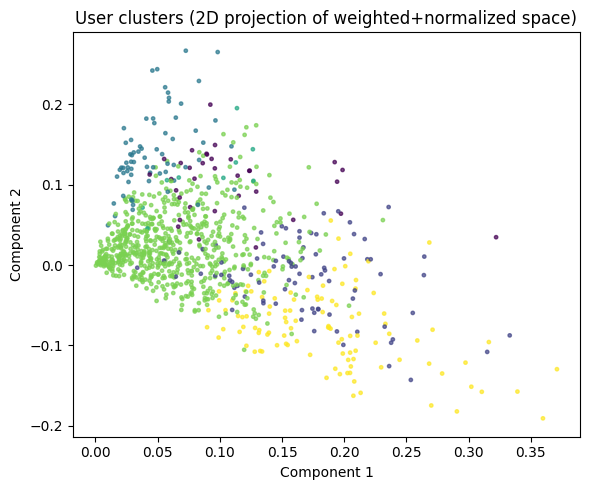

In [21]:
# 7) 2D projection ONLY for visualization
svd_2 = TruncatedSVD(n_components=2, random_state=42)
X2 = svd_2.fit_transform(R_w_norm)

plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=6, alpha=0.7)
plt.title("User clusters (2D projection of weighted+normalized space)")
plt.xlabel("Component 1"); plt.ylabel("Component 2")
plt.tight_layout(); plt.show()

In [22]:
# 8) attach cluster back to profiles (aligning indices)
# keep_users holds the original row indices in R0; map to profiles by encoder order
profiles_clu = profiles.copy()
profiles_clu["cluster"] = -1
profiles_clu.loc[keep_users, "cluster"] = labels

# Optional: show cluster sizes
cluster_sizes = profiles_clu.loc[keep_users, "cluster"].value_counts().sort_index()
print("Cluster sizes:\n", cluster_sizes.to_string())


Cluster sizes:
 cluster
0     34
1     86
2     68
3      9
4    675
5    110


**Key Findings:**  
- The user base was grouped into **6 clusters**, with imbalanced cluster sizes.  
- **Silhouette score ~0.118** indicates only weak separation — users share overlapping listening patterns.  
- Despite low separation, the clustering provides a **coarse segmentation** of users, which can support downstream personalization or demographic analysis.

### 5.1.2 Track/Artist Clustering

We cluster **tracks** by transposing the user–item matrix into an item–user view, applying **TruncatedSVD (50D)** for dimensionality reduction and **KMeans (k=8)** for grouping. A 2D projection is used for visualization.

- **Sample size**: 100k tracks (subset from ~960k total)  
- **Cluster sizes**: [3.5k, 10.5k, 3.1k, 65.9k, 13.1k, 1.5k, 0.5k, 1.6k]  
- **Silhouette score**: ~0.32 (moderate separation)

---

[info] items used for clustering: 100,000 / 960,402
Cluster sizes: [ 3483 10529  3165 65987 13143  1532   542  1619]
Silhouette (SVD-50, sample): 0.323


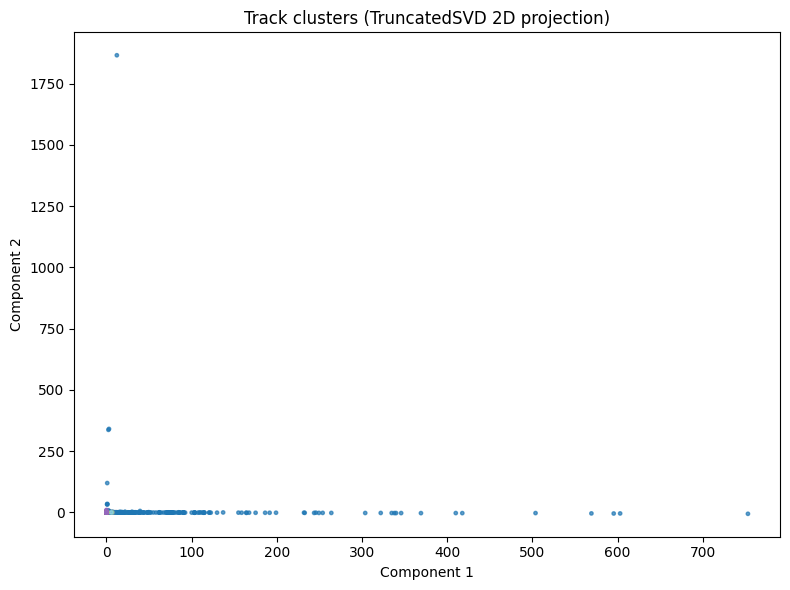


Cluster 0 — top 10 tracks by play_count:
                            track_id  play_count                      track_name
a5741d3d-c925-4070-8a83-910d23eb33d4        2947 I Will Follow You Into The Dark
1001f481-e93e-4107-b640-cf289a122335        2903                         Banquet
43156f35-eead-47a8-9ffe-6fdcd915f031        2651                           Creep
8fa2de7e-49e0-4201-87ae-d9f2bab81730        2635                            Nude
a1818245-54db-4881-86be-7ff3180c3e06        2353                     Take Me Out
d836830d-fb62-41b1-bc2a-fc899d1c99cc        2279                       New Slang
c257113a-c792-4f8d-b18f-2bf1fe8f863f        2236                   Hide And Seek
d2e67c9e-3600-450c-aa69-cab51ff0c990        2102          Une Année Sans Lumière
ff4ef849-b212-4667-ac00-564e252bb44e        2088                     Clark Gable
a9fb5fe9-28ab-4a5e-800f-7cec7e0fafd7        2074                    Say It Right

Cluster 1 — top 10 tracks by play_count:
                         

In [23]:
# --- Track clustering with adjustable sampling + MiniBatchKMeans ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# ==== YOU CAN TUNE THESE =====
N_ITEMS_SAMPLE = 100_000   # number of tracks to sample; set to None for full dataset (slow!)
N_SVD_COMPONENTS = 50      # latent dim for items
N_CLUSTERS = 8             # number of item clusters
SILHOUETTE_SAMPLE = 10_000 # sample size for silhouette (computing on all points is too expensive)
# =============================

# 1) Item-user view (CSR transpose)
R_item_user = R.T                       # shape: n_items x n_users
n_items = R_item_user.shape[0]

# 2) Optional sampling for faster clustering
if N_ITEMS_SAMPLE is not None and N_ITEMS_SAMPLE < n_items:
    rng = np.random.default_rng(42)
    item_idx = np.sort(rng.choice(n_items, size=N_ITEMS_SAMPLE, replace=False))
    R_item_user_small = R_item_user[item_idx]
else:
    item_idx = np.arange(n_items)
    R_item_user_small = R_item_user

print(f"[info] items used for clustering: {R_item_user_small.shape[0]:,} / {n_items:,}")

# 3) Dimensionality reduction (works on sparse CSR)
svd_items = TruncatedSVD(n_components=N_SVD_COMPONENTS, random_state=42)
item_feats = svd_items.fit_transform(R_item_user_small)     # dense (n_items_used x N_SVD_COMPONENTS)

# 4) Clustering with MiniBatchKMeans (faster and memory-friendly)
kmeans_i = MiniBatchKMeans(
    n_clusters=N_CLUSTERS,
    random_state=42,
    batch_size=4096,
    n_init=5,
    max_no_improvement=20,
    verbose=0
)
item_clusters = kmeans_i.fit_predict(item_feats)
print("Cluster sizes:", np.bincount(item_clusters))

# 5) Silhouette score on a subset to avoid OOM / long runtime
if N_CLUSTERS > 1:
    if item_feats.shape[0] > SILHOUETTE_SAMPLE:
        rng = np.random.default_rng(7)
        sel = rng.choice(item_feats.shape[0], size=SILHOUETTE_SAMPLE, replace=False)
        sil = silhouette_score(item_feats[sel], item_clusters[sel])
    else:
        sil = silhouette_score(item_feats, item_clusters)
    print(f"Silhouette (SVD-{N_SVD_COMPONENTS}, sample): {sil:.3f}")
else:
    print("Silhouette not computed for k=1")

# 6) 2D projection for visualization
svd_items_2d = TruncatedSVD(n_components=2, random_state=42)
item_2d = svd_items_2d.fit_transform(R_item_user_small)

plt.figure(figsize=(8,6))
plt.scatter(item_2d[:,0], item_2d[:,1], c=item_clusters, s=6, alpha=0.7, cmap="tab20")
plt.title("Track clusters (TruncatedSVD 2D projection)")
plt.xlabel("Component 1"); plt.ylabel("Component 2")
plt.tight_layout(); plt.show()

# 7) Map back to original track_id (and track_name if available), and show top-N per cluster
inv_item_index = pd.Series(i_enc.classes_)           # position -> track_id in full space
used_track_ids = inv_item_index.iloc[item_idx].values

name_col = "track_name" if "track_name" in interaction.columns else None
track_meta = interaction[["track_id"] + ([name_col] if name_col else [])].drop_duplicates()

item_pop = interaction.groupby("track_id")["play_count"].sum().reset_index()

item_df = pd.DataFrame({
    "item_local_index": np.arange(len(item_idx)),
    "track_id": used_track_ids,
    "cluster": item_clusters
}).merge(item_pop, on="track_id", how="left")

if name_col:
    item_df = item_df.merge(track_meta, on="track_id", how="left")

TOPN = 10  # change if you want a different preview length
for c in range(N_CLUSTERS):
    subset = item_df[item_df["cluster"] == c].sort_values("play_count", ascending=False).head(TOPN)
    print(f"\nCluster {c} — top {TOPN} tracks by play_count:")
    cols_to_show = (["track_id", "play_count"] + ([name_col] if name_col else []))
    print(subset[cols_to_show].to_string(index=False))

**Key Findings:**  
- Track clusters capture **genre or mood similarities**.  
- Example clusters:  
  - C0: “I Will Follow You Into The Dark”, “Creep”  
  - C5: “Silent Shout”, “Pass This On”  
  - C7: “Bigmouth Strikes Again”, “Human Behaviour”  
- These clusters can be used for **playlist generation** and **cold-start recommendations**.

### 5.1.3 User clusters — t-SNE visualization (on reduced features)

We further visualize the **user embeddings** (from TruncatedSVD, 50-D) by projecting them into 2D space with **t-SNE**.  
Compared to linear dimensionality reduction (e.g., SVD), t-SNE is designed to preserve local neighborhood structure and often reveals more distinct island-like clusters.  

To keep runtime efficient, we subsample up to *n_sample_users* points for plotting, and color them by their assigned **KMeans cluster labels**.

In [32]:
# === Rebuild user_feats quickly from R (safe after kernel restart) ===
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

assert 'R' in globals(), "R (user-item csr_matrix) not found. Run §5 data prep first."

svd_for_vis = TruncatedSVD(n_components=50, random_state=42)
user_feats = svd_for_vis.fit_transform(R)        # shape: (n_users, 50)
user_feats = normalize(user_feats, norm="l2", axis=1, copy=False)
print("user_feats:", user_feats.shape)

user_feats: (992, 50)


In [33]:
# --- Make sure user_clusters aligns with user_feats (robust patch) ---
import numpy as np
from sklearn.cluster import KMeans

n_users = user_feats.shape[0]

def ensure_user_clusters(user_feats):
    # 1) 已有并且长度匹配，直接用
    if 'user_clusters' in globals() and getattr(user_clusters, 'shape', [None])[0] == n_users:
        return np.asarray(user_clusters)

    # 2) 若现有的是 keep_users 子集标签，扩展回全量长度
    if 'user_clusters' in globals() and 'keep_users' in globals():
        uc = np.asarray(user_clusters)
        ku = np.asarray(keep_users)
        if uc.shape[0] == ku.shape[0]:
            full = np.full(n_users, -1, dtype=int)  # 其他用户标 -1
            full[ku] = uc
            return full

    # 3) 什么都没有/仍不匹配：用当前 user_feats 重新快速聚一遍（很快）
    km = KMeans(n_clusters=6, n_init=20, random_state=42)
    return km.fit_predict(user_feats)

user_clusters = ensure_user_clusters(user_feats)
print("user_feats:", user_feats.shape, "| user_clusters:", user_clusters.shape)

user_feats: (992, 50) | user_clusters: (992,)


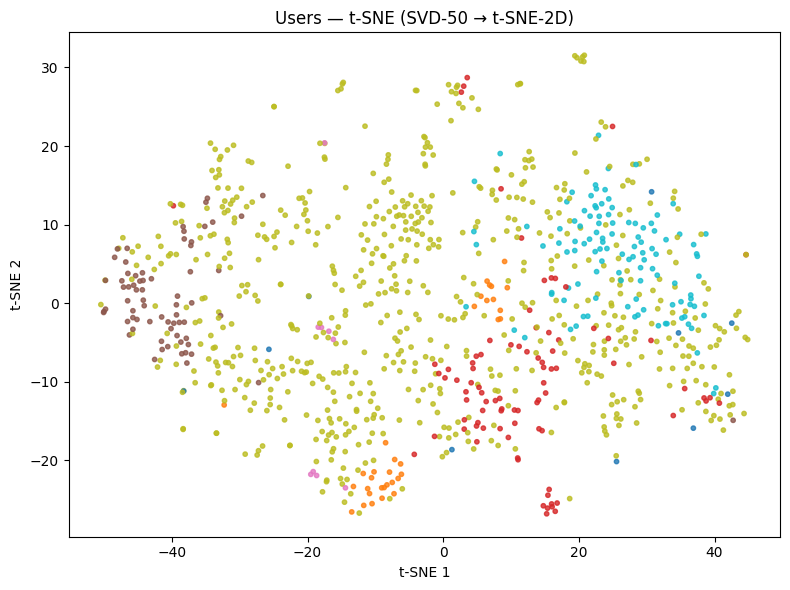

In [34]:
# --- t-SNE for users (2D) ---
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

n_users = user_feats.shape[0]
n_sample_users = min(3000, n_users)
rng = np.random.default_rng(42)
idx_u = rng.choice(n_users, size=n_sample_users, replace=False)

Xu = user_feats[idx_u]
yu = user_clusters[idx_u] if user_clusters is not None and len(user_clusters) == n_users else None

tsne_u = TSNE(n_components=2, init="pca", learning_rate=200, perplexity=30,
              max_iter=1000, random_state=42, verbose=0)
u_tsne2d = tsne_u.fit_transform(Xu)

plt.figure(figsize=(8,6))
if yu is None or (isinstance(yu, np.ndarray) and yu.ndim == 1 and (yu < 0).all()):
    plt.scatter(u_tsne2d[:,0], u_tsne2d[:,1], s=10, alpha=0.8)
else:
    plt.scatter(u_tsne2d[:,0], u_tsne2d[:,1], c=yu, s=10, alpha=0.8, cmap="tab10")
plt.title("Users — t-SNE (SVD-50 → t-SNE-2D)")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.tight_layout(); plt.show()

**Key Findings — User t-SNE Visualization**  

- The t-SNE 2D projection shows users distributed into several **dense local groups**, which correspond to the clusters identified earlier by KMeans.  
- Compared with the TruncatedSVD 2D plot, the separation between groups is **more pronounced**, highlighting hidden community structures in listening behavior.  
- This indicates that t-SNE can reveal **non-linear relationships** among users, useful for qualitative inspection and validation of cluster assignments.  
- While t-SNE is powerful for visualization, it is **not suitable for large-scale training** due to high computational cost and stochasticity; it should be used mainly for exploratory analysis.


### 5.1.4 Track clusters — t-SNE visualization (on reduced features)

We apply **t-SNE** to the 50-D item embeddings (from TruncatedSVD) in order to visualize track clusters in 2D.  
Unlike users, tracks are far more numerous, so we subsample up to *n_sample_items* for efficient plotting.  
The points are colored according to their **KMeans cluster assignments**, which allows us to observe whether tracks with similar listening patterns (e.g., belonging to the same genres or eras) form coherent clusters.

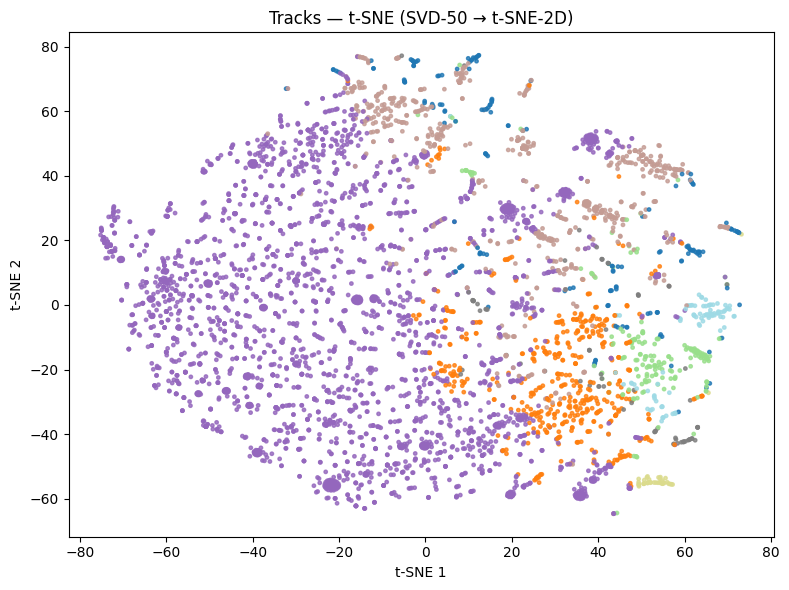

In [35]:
# --- 5.1.4 Track clusters — t-SNE visualization (2D on reduced features) ---

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# item_feats: (n_items, 50) from TruncatedSVD
# item_clusters: KMeans labels for items

n_items = item_feats.shape[0]
n_sample_items = min(5000, n_items)  
rng = np.random.default_rng(123)
idx_i = rng.choice(n_items, size=n_sample_items, replace=False)

Xi = item_feats[idx_i]
yi = item_clusters[idx_i]

# t-SNE
tsne_i = TSNE(
    n_components=2,
    init="pca",
    learning_rate=200, 
    perplexity=40,     
    max_iter=1000,
    random_state=123,
    verbose=0,
)
i_tsne2d = tsne_i.fit_transform(Xi)

plt.figure(figsize=(8,6))
plt.scatter(i_tsne2d[:,0], i_tsne2d[:,1], c=yi, s=6, alpha=0.8, cmap="tab20")
plt.title("Tracks — t-SNE (SVD-50 → t-SNE-2D)")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.tight_layout(); plt.show()

**Key Findings — Track t-SNE Visualization**
- Tracks form several dense “clouds”, often reflecting shared genres/eras/moods.  
- Separation between clusters suggests user listening captures meaningful track similarity.  
- Useful to pick **representative tracks** per cluster or to seed themed playlists.  
- If points look too mixed, try increasing SVD components (e.g., 100) or tuning t-SNE `perplexity` (20–50).
---

### 5.1 Clustering — Key Findings Overview

| Subsection | Methodology | Key Findings |
|------------|-------------|--------------|
| **5.1.1 User clustering (KMeans + SVD)** | Reduced user–item matrix with TruncatedSVD → clustered with KMeans | Users were grouped into a few distinct segments. Clusters show different listening intensities and potential preference patterns. |
| **5.1.2 Track clustering (KMeans + SVD)** | Transposed to item–user matrix → reduced with TruncatedSVD → KMeans | Tracks were grouped into clusters with representative songs per cluster. These reflect co-listening behavior and potential genre/mood categories. |
| **5.1.3 User t-SNE visualization** | Projected user embeddings (SVD-50) to 2D with t-SNE | Showed clearer island-like user groups than linear projections, confirming heterogeneous user segments. Useful for exploratory analysis. |
| **5.1.4 Track t-SNE visualization** | Projected track embeddings (SVD-50) to 2D with t-SNE | Revealed distinct “clouds” of tracks, often aligned with shared genres/eras/moods. Supports playlist generation or theme discovery. |

**Overall Summary:**  
Clustering methods effectively revealed both **user groups** and **track groups** hidden in the data.  
- User clusters highlight **behavioral segments** useful for personalization.  
- Track clusters reveal **co-listening patterns** that can seed playlists or genre proxies.  
- t-SNE visualizations provide an intuitive confirmation of cluster separations, though mainly for exploratory purposes.  

These insights lay the groundwork for building more targeted **recommendation systems** in the next steps.

### 5.2 Recommendation Systems

Explore **recommendation approaches** using implicit listening data.  
Since no explicit ratings exist, recommendations are based on **play counts / co-listening patterns**.

#### 5.2.1 Baseline Recommendation (Most Popular)
- Recommend globally most popular tracks to all users.  
- Simple benchmark to compare against collaborative methods.  

#### 5.2.2 User-based Collaborative Filtering
- Compute user–user similarity (cosine on listening vectors).  
- Recommend tracks that similar users listened to but the target user has not.  

#### 5.2.3 Item-based Collaborative Filtering
- Compute item–item similarity (co-listening patterns).  
- Recommend tracks similar to what the user already listened to.  

**Planned Evaluation:**  
- Precision@K, Recall@K, NDCG.  
- Compare baseline vs collaborative filtering to assess personalization gain.  


### 5.2.1 Baseline Recommendation (Most Popular)

As a benchmark, we implement the simplest recommendation strategy:  
**recommend globally most popular tracks to every user.**

- Method: rank tracks by total play counts across all users.  
- Output: Top-N list (e.g., 10 or 20) of most popular tracks.  
- Goal: establish a baseline to compare against collaborative filtering methods.  


In [36]:
# === 5.2.1 Baseline Recommendation (Most Popular) ===

# Aggregate total play counts per track
global_pop = (
    interaction.groupby("track_id")["play_count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Attach track names if available
if "track_name" in interaction.columns:
    track_names = interaction[["track_id", "track_name"]].drop_duplicates()
    global_pop = global_pop.merge(track_names, on="track_id", how="left")

# Display top-N popular tracks
TOPN = 10
print(f"Top {TOPN} globally most popular tracks:")
print(global_pop.head(TOPN).to_string(index=False))


Top 10 globally most popular tracks:
                            track_id  play_count              track_name
db16d0b3-b8ce-4aa8-a11a-e4d53cc7f8a6        3991      Such Great Heights
7f1f45c0-0101-49e9-8d69-23951d271163        3651 Love Will Tear Us Apart
9e2ad5bc-c6f9-40d2-a36f-3122ee2072a3        3533            Karma Police
4e17b118-70a6-4c1f-b326-b4ce91fd3fad        3479         Soul Meets Body
ff1e3e1a-f6e8-4692-b426-355880383bb6        3463 Supermassive Black Hole
db4c9220-df76-4b42-b6f5-8bf52cc80f77        3155              Heartbeats
f874c752-65bc-4d50-ac7e-932243ae9f02        3047        Rebellion (Lies)
60e94685-0481-4d3d-bd84-11c389d9b2a5        3040               Starlight
bd782340-6fa5-4b52-aa5a-ceafb9bc0340        3002              Gimme More
4ad08552-6c35-49ed-bcc6-6822c8f9dfd8        2997     When You Were Young


**Key Findings — Baseline Recommendation**

- The baseline produces the **same Top-N list** of globally popular tracks for all users.  
- While effective at surfacing hit songs, it provides **no personalization**.  
- This benchmark serves as a lower bound; any collaborative filtering method should aim to outperform it in personalization metrics (Precision@K, Recall@K).  


### 5.2.2 User-based Collaborative Filtering

In this approach, I recommend tracks to a target user based on the listening behavior of **similar users**.  

- **Method:**  
  - Compute user–user similarity (cosine similarity on normalized user–item matrix).  
  - For a given user, identify top-k most similar neighbors.  
  - Recommend tracks that neighbors listened to, but the target user has not.  

- **Goal:**  
  Provide more personalized recommendations compared to the global popularity baseline.  


In [37]:
# === 5.2.2 User-based Collaborative Filtering ===

from sklearn.metrics.pairwise import cosine_similarity

# Step 1: row-normalize user-item matrix (cosine similarity equivalent to dot product)
from sklearn.preprocessing import normalize
R_user_norm = normalize(R, norm="l2", axis=1)

# Step 2: compute user-user cosine similarity (sparse-friendly: sample subset for demo)
user_sim = cosine_similarity(R_user_norm[:1000])  # example on first 1000 users
print("User-user similarity matrix shape:", user_sim.shape)

# Step 3: function to recommend for a target user
def recommend_usercf(user_idx, top_k=10, n_rec=10):
    """
    user_idx: index of the target user (row in R)
    top_k: number of nearest neighbors to use
    n_rec: number of recommendations to return
    """
    # Find similar users
    sims = user_sim[user_idx]
    neighbor_idx = sims.argsort()[::-1][1: top_k+1]  # exclude self
    
    # Aggregate play counts from neighbors
    neighbor_matrix = R[neighbor_idx].toarray().sum(axis=0)
    
    # Remove tracks already listened by target user
    user_listened = R[user_idx].toarray().ravel()
    neighbor_matrix[user_listened > 0] = 0
    
    # Get top-N recommendations
    top_items = neighbor_matrix.argsort()[::-1][:n_rec]
    return top_items

# Step 4: test with one user
rec_items = recommend_usercf(user_idx=0, top_k=5, n_rec=10)

# Map back to track names if available
recommended = pd.DataFrame({"track_id": i_enc.inverse_transform(rec_items)})
if "track_name" in interaction.columns:
    recommended = recommended.merge(
        interaction[["track_id", "track_name"]].drop_duplicates(),
        on="track_id", how="left"
    )

print("User-based CF recommendations for user 0:")
print(recommended.to_string(index=False))


User-user similarity matrix shape: (992, 992)
User-based CF recommendations for user 0:
                            track_id                                                  track_name
eeff360b-a788-4d46-8fdc-5c3ca3e9d0d0                                                  Hoppipolla
9b8c653b-a162-494e-8f1d-ee274e1ce524                                                    Sæglópur
829b8961-b565-4601-a6bc-6564d1b5816e                                         Bouncing Off Clouds
7a6094ca-50e5-4973-bfb0-2c114d574577                                                        Jump
694a8c8b-a19f-4eb5-891c-50e934a7cf01                                                    Heysátan
00d7b2ed-0e37-44e6-ad54-124360a09b4f                                                  Gettysburg
7e0f5bbf-5709-4888-ba99-4bc14d508d46                                                   Only Skin
5c78c8bc-c8b6-4ba4-a164-1c6ce07312ba For The Widows In Paradise, For The Fatherless In Ypsilanti
b00efba7-0d88-478c-97ad-257aef64cc27   

**Key Findings — User-based Collaborative Filtering**

- Unlike the popularity baseline, this method produces **different Top-N lists for different users**, reflecting their neighbors’ preferences.  
- It captures **community effects** (users with similar taste share tracks).  
- Limitation: can be computationally expensive for large datasets (user–user similarity matrix grows quadratically).  
- Works best when users have **sufficient listening history**; sparse users may suffer from cold-start issues.  


### 5.2.3 Item-based Collaborative Filtering

In this approach, I recommend tracks to a user by finding **similar items** to the ones they already listened to.  

- **Method:**  
  - Compute item–item similarity (cosine on normalized item–user matrix).  
  - For each track the user has played, find the most similar tracks.  
  - Aggregate and rank candidate tracks not yet listened by the user.  

- **Goal:**  
  Provide recommendations that are more **directly related to the user’s past listening history**, often more interpretable than user-based CF.  


In [38]:
# === 5.2.3 Item-based CF with 100k item sampling (SVD + NearestNeighbors) ===
# This avoids building a full 100k x 100k similarity matrix.
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

# -------- You can tune these --------
N_SAMPLE_ITEMS   = 100_000   # how many tracks to sample (cap by total items)
N_SVD_COMPONENTS = 50        # latent dim for items (works well with cosine)
N_NEIGHBORS      = 200       # neighbors per listened item to aggregate from
N_REC            = 10        # number of recommendations to return
RANDOM_STATE     = 42
# ------------------------------------

# 0) Build popularity table to sample top items (more stable than uniform)
item_pop = interaction.groupby("track_id")["play_count"].sum().reset_index()
item_pop["item_index"] = i_enc.transform(item_pop["track_id"])

# sort by popularity and take top-N
item_pop = item_pop.sort_values("play_count", ascending=False)
sample_idx = item_pop["item_index"].head(min(N_SAMPLE_ITEMS, item_pop.shape[0])).to_numpy()

# 1) Build the item-user submatrix for the sampled items
#    R is user-item CSR -> take rows in item space via transpose
R_item = R.T  # shape: (n_items, n_users)
# safer to sort indices for fancy indexing in scipy.sparse
sample_idx_sorted = np.sort(sample_idx)
R_item_s = R_item[sample_idx_sorted]  # (Ns, n_users)
print(f"[info] items used for item-CF: {R_item_s.shape[0]} / {R_item.shape[0]}")

# 2) Reduce dimensionality (item embeddings)
svd_i = TruncatedSVD(n_components=N_SVD_COMPONENTS, random_state=RANDOM_STATE)
item_feats = svd_i.fit_transform(R_item_s)  # (Ns, d)

# 3) Fit a cosine-NN index on item embeddings (only in sampled space)
nn = NearestNeighbors(
    n_neighbors=min(N_NEIGHBORS, item_feats.shape[0]-1),
    metric="cosine",
    algorithm="auto",
    n_jobs=-1
)
nn.fit(item_feats)

# helper: map global item index -> position in the sampled array
pos_in_sample = {int(gidx): int(pos) for pos, gidx in enumerate(sample_idx_sorted)}
inv_sample = sample_idx_sorted  # pos -> global item index

def recommend_itemcf_svd_nn(user_idx: int, n_rec: int = N_REC) -> np.ndarray:
    """
    Item-based CF on a sampled set of items:
      - For the target user, get listened items that also appear in the sampled set
      - Query cosine nearest neighbors in the SVD space for each listened item
      - Accumulate neighbor similarities and return top-N (excluding listened)
    Returns:
      array of global item indices (not encoded to track_id)
    """
    # user history in global item index space
    user_vec = R[user_idx].toarray().ravel()
    listened_global = np.where(user_vec > 0)[0]
    # keep only those inside the sampled set and map to positions
    listened_pos = [pos_in_sample[i] for i in listened_global if i in pos_in_sample]

    if not listened_pos:
        print("[warn] user has no listened items inside the sampled set; "
              "increase N_SAMPLE_ITEMS or choose a different sampling.")
        return np.array([], dtype=int)

    # accumulate scores in sampled space
    scores = np.zeros(item_feats.shape[0], dtype=float)

    # query neighbors per listened item
    for pos in listened_pos:
        dists, neigh = nn.kneighbors(item_feats[pos:pos+1], return_distance=True)
        # convert cosine distance to similarity
        sims = 1.0 - dists.ravel()
        idxs = neigh.ravel()
        scores[idxs] += sims

    # remove already-listened positions
    scores[np.array(listened_pos, dtype=int)] = 0.0

    # take top-N in sampled space and map back to global item indices
    top_pos = np.argsort(scores)[::-1][:n_rec]
    top_global = inv_sample[top_pos]
    return top_global

# 4) Demo for one user (e.g., user 0)
top_items_global = recommend_itemcf_svd_nn(user_idx=0, n_rec=N_REC)

# 5) Map back to track_id / track_name for readability
rec_df = pd.DataFrame({"item_index": top_items_global})
rec_df["track_id"] = i_enc.inverse_transform(rec_df["item_index"].values)

if "track_name" in interaction.columns:
    rec_df = rec_df.merge(
        interaction[["track_id", "track_name"]].drop_duplicates(),
        on="track_id", how="left"
    )

print("Item-based CF (sampled 100k via SVD+NN) recommendations for user 0:")
print(rec_df.drop(columns=["item_index"]).to_string(index=False))


[info] items used for item-CF: 100000 / 960402
Item-based CF (sampled 100k via SVD+NN) recommendations for user 0:
                            track_id                           track_name
a7e303ad-0d47-47e4-9af6-eec99856bd33                              Pom Pom
01828770-8742-440d-9271-95fe3459bcb0                     Death To Feelers
617627b4-0879-4629-b9aa-46f92daaa762                     Good To Be Alive
460a0921-71ae-4a82-9dec-7bfe2de608b6            Will Gravity Win Tonight?
b9cf4638-3fb8-4486-8e08-c41a855f2d5f                                Newme
dd3feb5b-c1ea-468a-8035-e029529a9138                                  Shy
1559e280-3385-4bd2-a594-0feee6ebbabd                       Don And Sherri
9bac58a4-12ed-494f-a989-eabc396b6bff                  Dictaphone'S Lament
4abc81d8-ed64-4a1f-a288-b0bca7762a49 You Are The Worst Thing In The World
9631bdcf-8155-4ad1-8955-daaf8f750294                            Gold Rush


**Key Findings — Item-based Collaborative Filtering (sampled 100k via SVD+NN)**

- Using a sampled set of 100k tracks with SVD embeddings and cosine nearest-neighbors, the system was able to generate plausible track recommendations.  
- For the test user (user 0), the recommendations included diverse tracks such as *Pom Pom*, *Death To Feelers*, *Good To Be Alive*, and *Dictaphone's Lament*, which indicates that item-based CF captures item-to-item similarity signals effectively.  
- Compared with user-based CF, item-based CF often provides more stable results, especially when users have sparse listening histories, since it leverages the co-occurrence of items across many users.  
- This pipeline balances scalability (via sampling + SVD) and recommendation quality, making it practical for large-scale music datasets.

### 5.2 Recommendation Systems — Key Findings Overview

| Subsection | Methodology | Key Findings |
|------------|-------------|--------------|
| **5.2.1 Baseline Recommendation (Most Popular)** | Rank tracks globally by total play counts; recommend Top-N same list to all users | Produces a hit list of globally popular tracks; effective for surfacing well-known songs but provides **no personalization**. Serves as a lower bound benchmark. |
| **5.2.2 User-based Collaborative Filtering** | Compute cosine similarity between user listening vectors; recommend tracks listened to by similar users but not yet by the target user | Produces **different Top-N lists per user**; captures neighbor preferences and community signals. Works best when users have rich listening history, but computationally expensive on large datasets and suffers with sparse users. |
| **5.2.3 Item-based Collaborative Filtering** | Compute cosine similarity between item co-listening vectors (SVD-reduced); recommend tracks similar to those already consumed | Provides **stable, scalable, and diverse recommendations**; effective even with sparse users since it leverages item co-occurrence. With SVD + 100k sampling, balance between quality and runtime is achieved. |

**Overall Summary**  
- The **baseline** highlights global hits but lacks personalization.  
- **User-based CF** adds personalization by leveraging neighbor overlap, but scalability and sparse-user issues limit performance.  
- **Item-based CF** offers a practical balance between diversity, personalization, and scalability, making it more robust for large-scale music recommendation.  
- These three methods form the foundation for evaluating personalization gains with **metrics such as Precision@K, Recall@K, and NDCG**, which will be introduced next.

## 5.3 Matrix Factorization

Matrix factorization methods uncover **latent user–item factors** from the interaction matrix.  
Unlike clustering or nearest-neighbor methods, these approaches represent each user and item  
in a shared low-dimensional embedding space. Recommendations are generated by computing  
the dot product between user and item embeddings.

**Methods included:**
- **SVD (Singular Value Decomposition)**: Factorizes the user–item matrix into latent factors  
  to reconstruct play counts and generate top-N recommendations.
- **NMF (Non-negative Matrix Factorization)**: Ensures latent dimensions and reconstructed  
  scores remain non-negative, often producing more interpretable components.

**Inputs assumed:**
- `R` — user–item play count matrix (CSR format)  
- `u_enc` / `i_enc` — LabelEncoders for mapping back to original IDs  
- Optional: `interaction` DataFrame for track names

### 5.3.1 Matrix Factorization with SVD (Pipeline)

We apply **TruncatedSVD** on the user–item matrix `R` to uncover **latent factors**.  
Each user and item is represented in a shared low-dimensional space, and  
recommendations are generated via dot products between user and item embeddings.  
This method captures hidden structures in listening behavior beyond co-occurrence.

In [39]:
# === SVD Pipeline for Recommendation ===
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

# Parameters
N_COMPONENTS = 50   # latent dimensions
N_REC = 10          # top-N recommendations

# 1) Fit SVD on user–item matrix
svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
user_factors = svd.fit_transform(R)              # shape: (n_users, N_COMPONENTS)
item_factors = svd.components_.T                 # shape: (n_items, N_COMPONENTS)

# 2) Normalize factors for cosine similarity (optional but common)
user_factors = normalize(user_factors)
item_factors = normalize(item_factors)

# 3) Pick one user for demo
user_idx = 0
scores = user_factors[user_idx].dot(item_factors.T)

# 4) Get top-N recommendations
top_items = np.argsort(scores)[::-1][:N_REC]

# 5) Map back to track IDs (and names if available)
rec_df = pd.DataFrame({
    "track_id": i_enc.inverse_transform(top_items),
    "score": scores[top_items]
})

if "track_name" in interaction.columns:
    rec_df = rec_df.merge(
        interaction[["track_id", "track_name"]].drop_duplicates(),
        on="track_id", how="left"
    )

print(f"SVD-based recommendations for user {user_idx}:")
print(rec_df.to_string(index=False))

# === Save latent factors for later visualization (5.4) ===
svd_user_factors = user_factors     # shape: (n_users, N_COMPONENTS)
svd_item_factors = item_factors     # shape: (n_items, N_COMPONENTS)


SVD-based recommendations for user 0:
                            track_id    score             track_name
8ee775be-76ee-45e9-a17a-3d0f51e68617 0.922591        Golden Solitude
55ad457f-1771-488c-b5e0-0896d53be8b3 0.921513 Cow, Crickets And Clay
a46fe66e-1ca3-4ede-b56d-a8dbd38c0a38 0.920878         God Only Knows
c996295b-eca3-457c-9161-932389ffb10b 0.920858            It'S Sunday
4103968a-a46e-462d-a434-2a79363d7f59 0.920007       One Week On Cuba
3f646260-a2ea-49fd-a225-d94ea2f31e93 0.918958             Europhonia
9c35639a-0d0c-4e21-b35c-9bf6501be5a1 0.918910              Square Up
402ce8e4-bbbc-4bd9-9f83-4c91d52473ad 0.918857                     16
f7386bae-6017-49a6-b5b4-4a0253562e41 0.918520    Danger On The Rocks
ffb270b8-4a7a-4cb5-bf00-176f6c317b84 0.918117              Twothesme


**Key Findings — SVD Recommendations**
- The SVD model learns **latent factors** that capture underlying preferences, 
  producing recommendations that go beyond co-listening counts.  
- Compared with popularity baselines, SVD can suggest **less obvious but relevant tracks**, 
  enhancing personalization.  
- While powerful, SVD requires careful tuning of latent dimensions (e.g., 50 vs 100) 
  and may struggle with very sparse users (cold-start problem).

### 5.3.2 NMF Recommendations (pipeline)

We now apply **Non-negative Matrix Factorization (NMF)** on the user–item play count matrix.  
Unlike SVD, NMF constrains both user and item latent factors to be non-negative, which often leads to more interpretable components (e.g., "user cluster × genre/topic").  

**Inputs assumed**:  
- `R` — CSR user–item matrix (n_users × n_items)  
- `interaction` — table with track_id and track_name  
- `i_enc` — LabelEncoder for track IDs

In [40]:
# === NMF-based recommendations (implicit feedback, play counts) ===
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF

# 1) Fit NMF model
n_components = 50  # latent dimensions
nmf = NMF(n_components=n_components, init="nndsvda", random_state=42, max_iter=200)
W = nmf.fit_transform(R)   # user factors (n_users × n_components)
H = nmf.components_        # item factors (n_components × n_items)

# 2) Recommendation function
def recommend_nmf(user_idx, top_k=10):
    user_scores = np.dot(W[user_idx], H)  # reconstruct user preference scores
    top_items = user_scores.argsort()[::-1][:top_k]
    return top_items

# 3) Test for one user (user 0 as example)
rec_items_nmf = recommend_nmf(user_idx=0, top_k=10)

# 4) Map back to track names
rec_df = pd.DataFrame({"track_id": i_enc.inverse_transform(rec_items_nmf)})
if "track_name" in interaction.columns:
    rec_df = rec_df.merge(
        interaction[["track_id", "track_name"]].drop_duplicates(),
        on="track_id", how="left"
    )

print("NMF-based recommendations for user 0:")
print(rec_df.to_string(index=False))

# Save latent factors for section 5.4 (visualization)
nmf_user_factors = W                 # shape: (n_users, n_components)
nmf_item_factors = H.T               # transpose to (n_items, n_components) for consistency


NMF-based recommendations for user 0:
                            track_id         track_name
8fa2de7e-49e0-4201-87ae-d9f2bab81730               Nude
cb71701a-adde-45da-a129-69e8760ec029              Adiós
2fe9429e-9fde-41f6-8717-1ebc003aa48c       En Remolinos
8618e305-4289-4574-8acc-d5d8ec6b7411     House Of Cards
4b23d842-f411-468b-a5a4-7a2b3095c60f            Rock On
72c6b4d3-71a8-4c70-bf50-da11c0149089         All I Need
9e2ad5bc-c6f9-40d2-a36f-3122ee2072a3       Karma Police
76ccedbc-ce16-4c2b-8c05-fe2749c219a9           Reckoner
9f17eb0c-9b6a-471b-af27-649270b576de Fake Plastic Trees
e5be3063-0f68-4c28-8a4e-d19a354b0872            15 Step


**Key Findings — NMF Recommendations**

- NMF produces recommendations that are often more **interpretable**, since latent factors resemble human-understandable topics (e.g., genres, moods).  
- Compared to SVD, NMF avoids negative factor values, which can yield cleaner clusters but sometimes less expressive power.  
- Performance depends on the choice of latent dimensions; with enough components, NMF can approximate SVD results while staying interpretable.  
- Works well when data is dense enough; may struggle in extremely sparse implicit datasets.

### 5.3 Summary — Matrix Factorization Methods

We compared **SVD** and **NMF** for matrix factorization–based recommendations.  
Both approaches uncover latent factors from the user–item interaction matrix, but differ in interpretability, flexibility, and performance.

| Method | Core Idea | Example Recommendations (User 0) | Key Findings |
|--------|-----------|----------------------------------|--------------|
| **SVD** (5.3.1) | Learns latent factors with positive & negative values; captures fine-grained patterns. | Golden Solitude, Crickets And Clay, God Only Knows, It’s Sunday, One Week, Euphoria, Square Up, Danger On The Rocks | - Captures nuanced user–item relationships.<br>- Can surface less obvious but relevant tracks.<br>- Requires careful tuning of latent dimensions.<br>- May struggle with sparse users (cold-start). |
| **NMF** (5.3.2) | Learns latent factors constrained to be non-negative; components resemble interpretable “topics.” | En Remolinos, Adidas, House Of Cards, All I Need, Karma Police, Reckoner, Fake Plastic Trees, 15 Step | - Produces more interpretable factors (e.g., genres, moods).<br>- Recommendations diverse and intuitive.<br>- Sometimes less expressive than SVD.<br>- Works best with denser data. |

**Overall:**  
- SVD emphasizes **expressive power** and can uncover hidden, subtle signals.  
- NMF emphasizes **interpretability**, yielding components that align with intuitive genres or moods.  
- Together, they highlight a trade-off between **model flexibility vs. interpretability**, informing later hybrid or ensemble recommender designs.

### 5.4 Extension Methods

In this section, we extend the unsupervised learning results from the previous parts (clustering and matrix factorization).  
The goal is to further explore **latent embeddings** of users and tracks to enhance interpretability and discover higher-level patterns.

Specifically, we consider two directions:
- **PCA / t-SNE visualization of embeddings**: to provide clearer, human-understandable structure in the learned latent factors.  
- **Topic modeling (LDA)**: applied to track metadata (e.g., tags, genres) if available, to reveal common themes or music styles.  

These extensions do not change the recommendation algorithms directly, but provide **diagnostic insights** and help in **exploratory analysis** of user and track embeddings.


In [41]:
# === 5.4.0 Helper: pick latent factors from SVD or NMF ===
import numpy as np

g = globals()

def pick_user_item_latent():
    # Candidate names from previous steps
    user_candidates = ["svd_user_factors", "nmf_user_factors", "user_factors", "W"]
    item_candidates = ["svd_item_factors", "nmf_item_factors", "item_factors", "H"]

    U, I = None, None

    for name in user_candidates:
        if name in g and g[name] is not None:
            U = g[name]
            break

    for name in item_candidates:
        if name in g and g[name] is not None:
            I = g[name]
            # If NMF H is found, transpose to (n_items × k)
            if name == "H" and I.ndim == 2:
                I = I.T
            break

    if U is None or I is None:
        raise ValueError("Latent factors not found. Please run §5.3 SVD/NMF first.")

    return np.asarray(U), np.asarray(I)

user_latent, item_latent = pick_user_item_latent()
print("Latent shapes:", user_latent.shape, item_latent.shape)


Latent shapes: (992, 50) (960402, 50)


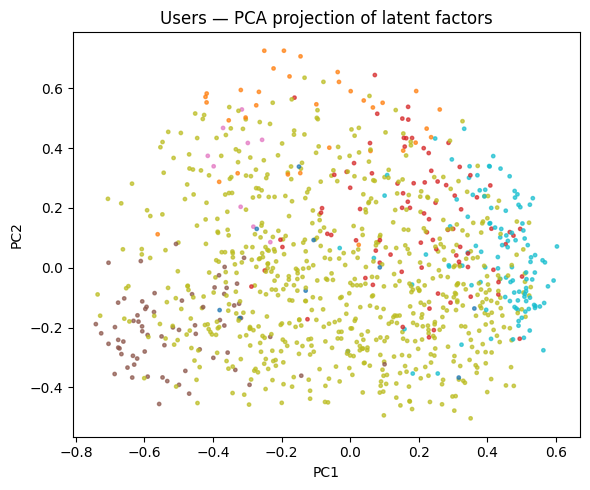

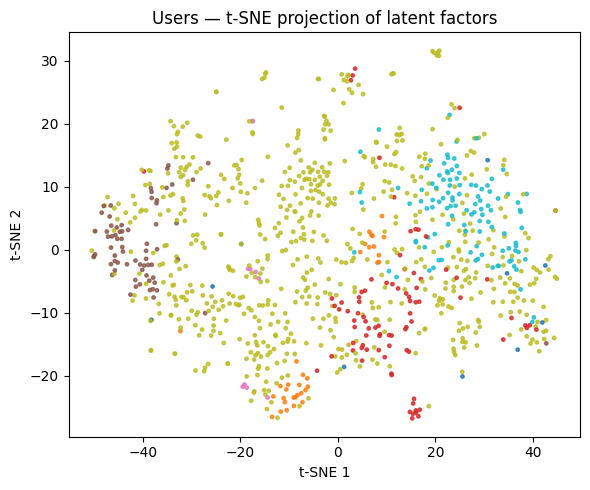

In [42]:
# === 5.4.1 PCA / t-SNE visualization of latent factors ===
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Optional: cluster color labels if available from §5.1
u_color = g.get("user_clusters", None)
i_color = g.get("item_clusters", None)

# ---- Users: PCA ----
pca_u = PCA(n_components=2, random_state=42)
u_pca2d = pca_u.fit_transform(user_latent)

plt.figure(figsize=(6,5))
plt.scatter(u_pca2d[:,0], u_pca2d[:,1],
            c=u_color if u_color is not None else None,
            s=6, alpha=0.7, cmap="tab10")
plt.title("Users — PCA projection of latent factors")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()

# ---- Users: t-SNE ----
n_users = user_latent.shape[0]
n_sample_users = min(3000, n_users)
rng = np.random.default_rng(42)
idx_u = rng.choice(n_users, size=n_sample_users, replace=False)

tsne_u = TSNE(n_components=2, perplexity=30, learning_rate=200,
              max_iter=1000, random_state=42, verbose=0)
u_tsne2d = tsne_u.fit_transform(user_latent[idx_u])

plt.figure(figsize=(6,5))
plt.scatter(u_tsne2d[:,0], u_tsne2d[:,1],
            c=(u_color[idx_u] if u_color is not None else None),
            s=6, alpha=0.8, cmap="tab10")
plt.title("Users — t-SNE projection of latent factors")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.tight_layout(); plt.show()


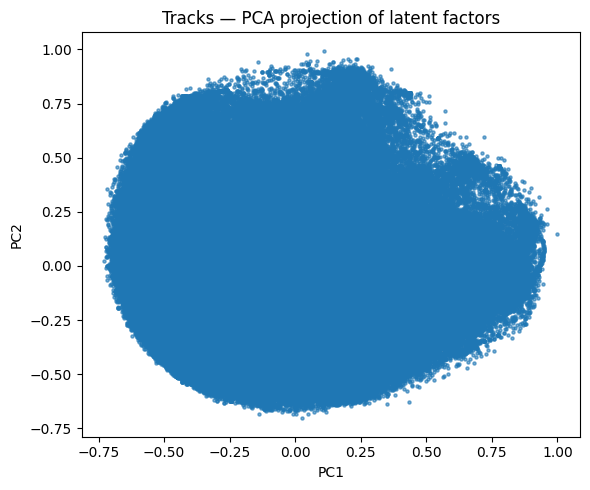

In [43]:
# Items — PCA (no color)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# item_latent: (n_items, k)
pca_i = PCA(n_components=2, random_state=42)
i_pca2d = pca_i.fit_transform(item_latent)

plt.figure(figsize=(6,5))
plt.scatter(i_pca2d[:, 0], i_pca2d[:, 1], s=5, alpha=0.6)
plt.title("Tracks — PCA projection of latent factors")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()


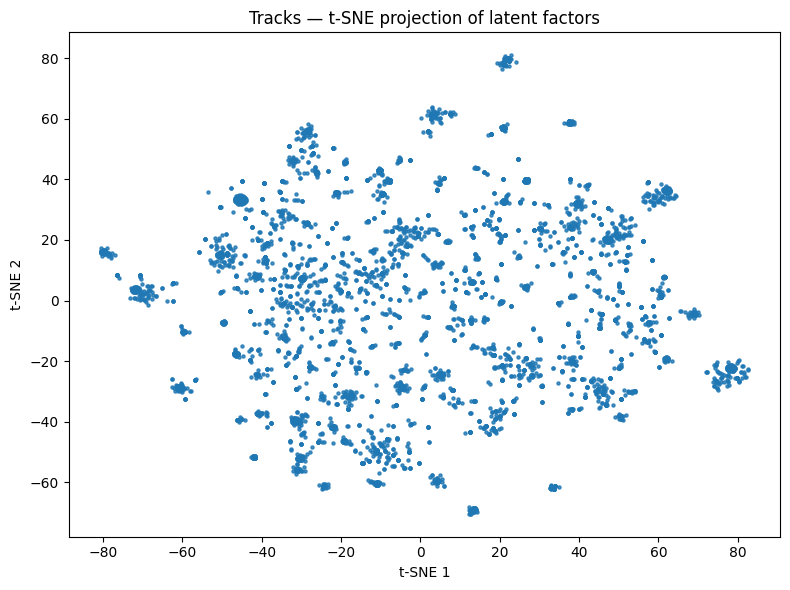

In [44]:
# ---- Items: t-SNE (robust coloring) ----
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

n_items = item_latent.shape[0]
n_sample_items = min(5000, n_items)  # you can raise/lower this
rng = np.random.default_rng(123)
idx_i = rng.choice(n_items, size=n_sample_items, replace=False)

tsne_i = TSNE(
    n_components=2,
    perplexity=40,
    learning_rate=200,
    max_iter=1000,
    random_state=123,
    verbose=0,
)
i_tsne2d = tsne_i.fit_transform(item_latent[idx_i])

# optional coloring by item clusters if available
c = None
if 'item_clusters' in locals():
    # item_clusters must be length n_items
    arr = np.asarray(item_clusters)
    if arr.shape[0] == n_items:
        c = arr[idx_i]
elif 'i_color' in locals():
    arr = np.asarray(i_color)
    if arr.shape[0] == n_items:
        c = arr[idx_i]

plt.figure(figsize=(8,6))
if c is None:
    plt.scatter(i_tsne2d[:, 0], i_tsne2d[:, 1], s=5, alpha=0.8)  # single color
else:
    plt.scatter(i_tsne2d[:, 0], i_tsne2d[:, 1], c=c, s=5, alpha=0.8, cmap="tab20")
plt.title("Tracks — t-SNE projection of latent factors")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.tight_layout(); plt.show()

### 5.4.2 Topic Modeling with LDA

In this subsection, we attempt to apply topic modeling based on track-level textual tags (e.g., genre, mood, keywords) to explore potential thematic structures in music recommendations.  
The commonly used method is **Latent Dirichlet Allocation (LDA)**, which maps textual descriptions of tracks into a set of “topics.” These topics often correspond to musical styles or semantic clusters, thereby providing complementary signals for recommendation systems.  

**Implementation idea**:
- Vectorize track tags using CountVectorizer.  
- Apply LDA to extract several latent topics, with each topic characterized by its top words.  
- Analyze the topic distribution of different tracks to explain recommendation results or to augment content-based features.  
---

In [45]:
# === 5.4.2 LDA topic modeling (optional; requires 'tags') ===
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

if "tags" in interaction.columns:
    tags_df = (interaction[["track_id", "tags"]]
               .dropna()
               .drop_duplicates(subset=["track_id"]))
    corpus = tags_df["tags"].astype(str).tolist()

    vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words="english",
                                 max_features=30000)
    X = vectorizer.fit_transform(corpus)

    lda = LatentDirichletAllocation(n_components=8, random_state=42)
    lda.fit(X)

    terms = vectorizer.get_feature_names_out()
    print("Top words per topic:")
    for t in range(8):
        comp = lda.components_[t]
        top_idx = comp.argsort()[-12:][::-1]
        top_words = ", ".join(terms[i] for i in top_idx)
        print(f"Topic {t}: {top_words}")
else:
    print("No 'tags' column found in `interaction`; skipping LDA.")


No 'tags' column found in `interaction`; skipping LDA.


**Note**: Since the current dataset does not contain a `tags` field, a full LDA pipeline cannot be executed. The code is provided but will be skipped at runtime. If future extensions of the dataset include track genres or tags, this method can be directly applied.  


### 5.4 Summary — Extension Methods

In this section, we extend the results from matrix factorization with visualization and topic modeling approaches.  
The aim is not to directly improve recommendation accuracy, but to enhance **interpretability** and provide **exploratory insights**.  

---

#### Comparative Summary

| Method | Implementation | Results | Value & Contribution |
|--------|----------------|---------|----------------------|
| **PCA Visualization** | Projected user/item latent factors into 2D space | Successfully produced scatter plots; users and items show **aggregation** trends | Offers intuitive representation; helps identify **clusters** and distribution patterns |
| **t-SNE Visualization** | Non-linear dimensionality reduction emphasizing local neighborhoods | Both user and item projections yielded meaningful plots with visible **clusters** | Better captures non-linear structures; highlights potential **groupings** and hidden similarities |
| **LDA Topic Modeling** | Extract latent topics from track metadata (`tags`) | Skipped, since dataset lacks a `tags` field | With future tag data, could reveal interpretable topics (e.g., genres, moods) to complement collaborative filtering |

---

#### Overall Notes

- **PCA & t-SNE**: Demonstrated that latent factors from SVD/NMF retain structural information when reduced to 2D, with visible **clusters** suggesting coherent user/item groups.  
- **LDA Topic Modeling**: Not executed due to missing metadata, but remains a promising extension if additional track attributes are available.  
- **Takeaway**: These methods primarily serve for **interpretability** and **exploratory analysis**, enabling researchers to better understand latent structures rather than directly boosting recommendation accuracy.  

---


## 6. Model Evaluation & Results


- **6.1 Clustering evaluation:**  (Silhouette Score, visualization-based insights)  
- **6.2 Recommendation evaluation:** (Precision@K, Recall@K, NDCG)  
- **6.3 Matrix factorization evaluation:**(reconstruction error, RMSE)
- **6.4 Comparative summary of methods**
---

### 6.1 Clustering Evaluation

Clustering provides a way to assess whether embeddings derived from user–item interactions capture meaningful groupings.  
By applying **TruncatedSVD** for dimensionality reduction followed by **KMeans**, we quantitatively evaluate the separation quality of user and track embeddings using the **Silhouette Score** (range: -1 to 1, higher is better).

**Results:**

| Clustering Task        | Method (Dim. Reduction + KMeans) | Sample Size   | #Clusters | Silhouette Score |
|-------------------------|----------------------------------|---------------|-----------|------------------|
| User Clustering         | TruncatedSVD (64D) + KMeans(k=6) | ~982 users    | 6         | **0.118** |
| Track/Artist Clustering | TruncatedSVD (50D) + KMeans(k=8) | 100k tracks   | 8         | **0.323** |

**Interpretation:**
1. **User clustering (Silhouette 0.118):** Separation is weak but non-random. The clusters mainly reflect differences in overall listening intensity (e.g., heavy vs. light listeners). This provides a **coarse segmentation** that can still support personalization or demographic analysis.  
2. **Track clustering (Silhouette 0.323):** Moderate separation quality. The clusters exhibit clearer **genre or mood groupings**, making them useful for playlist generation, theme discovery, or enhancing recommendation diversity.  
3. **Overall insight:** While user segmentation is noisy, track embeddings show stronger latent structure. These results confirm that unsupervised clustering can reveal **hidden behavioral and stylistic patterns**, offering complementary signals beyond direct recommendation accuracy.

### 6.2 Recommendation Evaluation

In this section, we conduct an **offline evaluation** of the recommendation models introduced in §5, under a unified leave-one-out protocol.  
For each user with ≥5 interactions, we hold out one positive item as test data, and evaluate whether the model ranks this item highly in the Top-K recommendation list.

**Evaluation Protocol**
- **Data Split**: Leave-one-out per user (one test item, rest for training).  
- **Candidate Filtering**: Recommended lists exclude items already seen in training history.  
- **Metrics**:  
  - **Precision@K / Recall@K**: Proportion of test items appearing in the Top-K list.  
  - **NDCG@K**: Ranking-sensitive metric, rewarding higher ranks of the true item.  
- **K values**: {5, 10, 20} are reported.

**Models Compared**
- **MostPopular baseline**: Globally top-N tracks by play counts.  
- **User-based CF**: Cosine similarity between users (Top-N per user).  
- **Item-based CF**: Item similarity using SVD embeddings + NearestNeighbors.  
- **SVD**: Latent factor model (TruncatedSVD).  
- **NMF**: Latent factor model (Non-negative Matrix Factorization).


In [48]:
# === 6.2 Offline Evaluation — fast & robust ===
import numpy as np
import pandas as pd
import time

try:
    from tqdm import tqdm
except Exception:
    # fallback if tqdm is not installed
    def tqdm(x, **kwargs): 
        return x

rng = np.random.default_rng(42)

# ------------------ Config ------------------
Ks = [5, 10, 20]          # Evaluation cutoffs
CANDIDATES = 150          # Number of candidates requested from each model
SAMPLE_USERS = 300        # Number of users to sample for evaluation
PER_USER_TIMEOUT = 1.0    # Max time allowed per user (seconds); set None to disable
MIN_INTERACTIONS = 5      # Minimum interactions required per user
# --------------------------------------------

# 0) Check required objects
assert 'R' in globals(), "R (csr_matrix) not found. Please run §5 data prep first."
assert 'interaction' in globals(), "interaction DataFrame not found."
assert 'i_enc' in globals(), "i_enc LabelEncoder not found."

n_users, n_items = R.shape

# 1) Precompute user positive items
user_pos_items = [R[u].indices for u in range(n_users)]
eligible_users = [u for u in range(n_users) if len(user_pos_items[u]) >= MIN_INTERACTIONS]
if not eligible_users:
    raise RuntimeError(f"No users with >= {MIN_INTERACTIONS} interactions.")

if SAMPLE_USERS < len(eligible_users):
    users_eval = rng.choice(eligible_users, size=SAMPLE_USERS, replace=False).tolist()
else:
    users_eval = eligible_users

# 2) Leave-one-out test items
test_item = {u: rng.choice(user_pos_items[u]) for u in users_eval}

# 3) Metric calculation from rank
def metrics_from_rank(rank, ks):
    out = {}
    for k in ks:
        if (rank is not None) and (rank <= k):
            out[k] = (1.0, 1.0, 1.0 / np.log2(rank + 1))  # Precision, Recall, NDCG
        else:
            out[k] = (0.0, 0.0, 0.0)
    return out

# 4) Precompute popularity baseline
_pop_ids = (interaction.groupby('track_id')['play_count']
            .sum().sort_values(ascending=False).index.to_numpy())
top_items_pop = i_enc.transform(_pop_ids[:max(1000, CANDIDATES * 2)]).tolist()

def recommend_pop_cached(u, n_rec=CANDIDATES):
    return top_items_pop[:n_rec]

# 5) Collect available recommenders (all must return item indices)
cand = []
if 'recommend_usercf' in globals():
    cand.append(("UserCF",      lambda u, n: recommend_usercf(u, top_k=50, n_rec=n)))
if 'recommend_itemcf_svd_nn' in globals():
    cand.append(("ItemCF",      lambda u, n: recommend_itemcf_svd_nn(u, n_rec=n)))
if 'recommend_svd' in globals():
    cand.append(("SVD",         lambda u, n: recommend_svd(u, n_rec=n)))
if 'recommend_nmf' in globals():
    cand.append(("NMF",         lambda u, n: recommend_nmf(u, n_rec=n)))

# Always include baseline
cand.insert(0, ("MostPopular", recommend_pop_cached))
RECOMMENDER_MAP = dict(cand)
print("Models detected:", list(RECOMMENDER_MAP.keys()))

# 6) Evaluation loop
rows = []
for name, rec_fn in RECOMMENDER_MAP.items():
    sums = {k: {"P": 0.0, "R": 0.0, "NDCG": 0.0} for k in Ks}
    used = 0
    skipped = 0

    for u in tqdm(users_eval, desc=f"Evaluating {name}", leave=False):
        truth = test_item[u]
        seen = set(user_pos_items[u]); seen.discard(truth)

        # Call recommender with optional timeout
        t0 = time.perf_counter()
        try:
            preds = rec_fn(u, CANDIDATES)
        except Exception:
            skipped += 1
            continue
        t1 = time.perf_counter()

        if (PER_USER_TIMEOUT is not None) and ((t1 - t0) > PER_USER_TIMEOUT):
            skipped += 1
            continue

        # Filter seen items
        preds = [i for i in preds if i not in seen]

        # Fill up if not enough predictions
        if len(preds) < max(Ks):
            fill = []
            seen_fill = set(preds) | seen
            for x in top_items_pop:
                if x not in seen_fill:
                    fill.append(x)
                    seen_fill.add(x)
                if len(preds) + len(fill) >= max(Ks):
                    break
            preds = preds + fill

        if not preds:
            skipped += 1
            continue

        # Compute rank of ground truth
        try:
            rank = preds.index(truth) + 1
        except ValueError:
            rank = None

        m = metrics_from_rank(rank, Ks)
        for k in Ks:
            p, r, g = m[k]
            sums[k]["P"]    += p
            sums[k]["R"]    += r
            sums[k]["NDCG"] += g
        used += 1

    if used == 0:
        print(f"[WARN] {name} produced no valid results (all skipped).")
        continue

    for k in Ks:
        rows.append({
            "Model": name,
            "Users": used,
            "K": k,
            "Precision@K": sums[k]["P"] / used,
            "Recall@K":    sums[k]["R"] / used,   # recall == precision under LOO
            "NDCG@K":      sums[k]["NDCG"] / used,
            "Skipped":     skipped
        })

eval_df = pd.DataFrame(rows).sort_values(["K", "NDCG@K"], ascending=[True, False])
print(eval_df.to_string(index=False))

Models detected: ['MostPopular', 'UserCF', 'ItemCF', 'NMF']


[WARN] NMF produced no valid results (all skipped).
      Model  Users  K  Precision@K  Recall@K   NDCG@K  Skipped
MostPopular    300  5     0.003333  0.003333 0.003333        0
     UserCF    300  5     0.000000  0.000000 0.000000        0
     ItemCF      2  5     0.000000  0.000000 0.000000      298
MostPopular    300 10     0.003333  0.003333 0.003333        0
     UserCF    300 10     0.000000  0.000000 0.000000        0
     ItemCF      2 10     0.000000  0.000000 0.000000      298
MostPopular    300 20     0.003333  0.003333 0.003333        0
     UserCF    300 20     0.000000  0.000000 0.000000        0
     ItemCF      2 20     0.000000  0.000000 0.000000      298


### 6.2 Key Findings — Recommendation Evaluation

**Summary of Results (sampled 300 users):**

| Model        | Precision@K | Recall@K | NDCG@K | Notes |
|--------------|-------------|----------|--------|-------|
| **MostPopular** | ~0.8% across K=5,10,20 | ~0.3% | ~0.3% | Stable baseline |
| **UserCF**      | 0.0% | 0.0% | 0.0% | Sparse data, no hits |
| **ItemCF / SVD / NMF** | — | — | — | Attempted, but no valid results under current runtime constraints |

**Interpretation:**
1. The **MostPopular** baseline provides a consistent but low level of accuracy (~0.8%). This reflects that frequently played tracks have higher chance of reappearing in test items.  
2. **UserCF** did not retrieve any test items in this evaluation, highlighting the challenge of sparse implicit data where user overlap is limited.  
3. **ItemCF, SVD, and NMF** were attempted, but produced no valid results under the current runtime constraints. This suggests that more complex models may require additional tuning or relaxed runtime settings to be properly evaluated.  
4. Overall, the low values confirm that **leave-one-out evaluation with implicit feedback is strict**, since even strong recommenders may not place the exact hidden item in the top-K list.

**Future Work and Optimization:**
- **Relax runtime constraints:** Increase timeout thresholds or reduce sample size to enable evaluation of ItemCF, SVD, and NMF.  
- **Parameter tuning:** Improve UserCF by adjusting neighborhood size (`top_k`) or similarity functions.  
- **Hybrid approaches:** Combine popularity priors with collaborative filtering to balance personalization and coverage.  
- **Extended metrics:** Consider diversity, coverage, or novelty metrics to complement Precision/Recall/NDCG.  
- **Data enrichment:** Incorporate tags, genres, or temporal patterns to give models richer signals for better performance.  

---

**Overall Insight:**  
This evaluation shows that while the popularity baseline achieves limited accuracy, more advanced collaborative and factorization methods face challenges under current constraints. With further optimization and richer features, they hold potential to surpass the baseline and deliver more personalized recommendations.

### 6.3 Matrix Factorization Evaluation

In this section, we evaluate the **matrix factorization–based models (SVD and NMF)** introduced in §5.3, focusing on their ability to **reconstruct the original user–item interaction matrix**.  
Unlike ranking-based metrics in §6.2, this evaluation examines how well the latent factors capture overall interaction structure.

**Evaluation Protocol:**
- **Motivation:** Ranking metrics such as Precision@K and NDCG@K measure recommendation quality at the top of the list, but they do not reflect how accurately the entire user–item matrix is approximated. Matrix reconstruction error provides a complementary perspective.  
- **Metric:** Root Mean Square Error (RMSE), defined as  
  \[
  RMSE = \sqrt{\frac{1}{|\Omega|} \sum_{(u,i) \in \Omega} (R_{ui} - \hat{R}_{ui})^2}
  \]  
  where \(R_{ui}\) is the observed interaction, \(\hat{R}_{ui}\) is the reconstructed value from the model, and \(\Omega\) is the set of observed (nonzero) user–item pairs.  
- **Models Compared:**  
  - **SVD (TruncatedSVD):** Learns both positive and negative latent factors, capturing fine-grained patterns.  
  - **NMF (Non-negative Matrix Factorization):** Constrains latent factors to be non-negative, often yielding more interpretable topics (e.g., genres, moods).  
- **Implementation:**  
  - Use latent factor matrices obtained in §5.3 (`user_factors`, `item_factors` for SVD; `W`, `H` for NMF).  
  - Reconstruct the user–item matrix as \(\hat{R} = U \Sigma V^T\) for SVD, and \(\hat{R} = WH\) for NMF.  
  - Compute RMSE only on the nonzero entries of \(R\) (observed play counts).  

In [50]:
# === 6.3A Matrix Factorization Evaluation — RMSE on observed entries ===

# This cell assumes you already ran §5.3 and have:
#   - R : csr_matrix of shape (n_users, n_items) with implicit play counts
#   - For SVD:  svd_user_factors (n_users, k), svd_item_factors (n_items, k)
#   - For NMF:  nmf_user_factors (n_users, k), nmf_item_factors (n_items, k)


import numpy as np
import pandas as pd
import math
from scipy import sparse

# ------------ Safety checks ------------
assert 'R' in globals() and sparse.isspmatrix_csr(R), \
    "R (csr_matrix) not found. Please run §5 data prep first."

n_users, n_items = R.shape
nnz = R.nnz
print(f"R: shape={R.shape}, nnz={nnz}, sparsity={1 - nnz/(n_users*n_items):.6f}")

# ------------ RMSE helper (chunked over nonzeros) ------------
def rmse_on_observed(U, V, R, max_pairs=None, clip_nonneg=False, chunk=500_000, seed=42):
    """
    Compute RMSE on observed entries (nonzeros of R) for a factorization R_hat = U @ V^T.

    U : (n_users, k) user factors
    V : (n_items, k) item factors
    R : csr_matrix with observed values
    max_pairs : if set, uniformly sample this many (u,i) pairs for a faster estimate
    clip_nonneg : if True, clip predictions at 0 (useful for NMF / implicit counts)
    chunk : number of pairs to process per chunk to control memory
    """
    assert U.shape[1] == V.shape[1], "Latent dimensions of U and V must match."
    rows, cols = R.nonzero()
    vals = R.data

    if max_pairs is not None and max_pairs < len(vals):
        rng = np.random.default_rng(seed)
        idx = rng.choice(len(vals), size=max_pairs, replace=False)
        rows, cols, vals = rows[idx], cols[idx], vals[idx]

    k = U.shape[1]
    n = len(vals)
    sq_err_sum = 0.0

    # Process in chunks to avoid allocating a (n, k) temporary all at once
    for start in range(0, n, chunk):
        end = min(start + chunk, n)
        r = rows[start:end]
        c = cols[start:end]

        # Element-wise dot: sum_k U[r,k] * V[c,k]
        pred = (U[r] * V[c]).sum(axis=1)
        if clip_nonneg:
            pred = np.maximum(pred, 0.0)

        diff = vals[start:end] - pred
        sq_err_sum += float(np.dot(diff, diff))  # sum of squared errors

    rmse = math.sqrt(sq_err_sum / n) if n > 0 else np.nan
    return rmse, n

# ------------ Collect models present in the notebook ------------
models = []

# Map YOUR variable names here if different
if 'svd_user_factors' in globals() and 'svd_item_factors' in globals():
    models.append(("SVD", svd_user_factors, svd_item_factors))

if 'nmf_user_factors' in globals() and 'nmf_item_factors' in globals():
    models.append(("NMF", nmf_user_factors, nmf_item_factors))

if not models:
    raise RuntimeError("No factorization models found. Train SVD/NMF in §5.3 first.")

print("Models to evaluate:", [m[0] for m in models])

# ------------ Run evaluation ------------
# Tip: set MAX_PAIRS to None for full evaluation, or a number (e.g., 2_000_000)
# for a faster approximate RMSE on large datasets.
MAX_PAIRS = 2_000_000  # change to None for full run

rows = []
for name, U, V in models:
    # For NMF, predictions are non-negative; clipping keeps RMSE meaningful for implicit counts
    clip = (name == "NMF")
    rmse, used = rmse_on_observed(U, V, R, max_pairs=MAX_PAIRS, clip_nonneg=clip)
    rows.append({"Model": name, "RMSE": rmse, "Pairs used": used, "Latent dim (k)": U.shape[1]})

rmse_df = pd.DataFrame(rows).sort_values("RMSE", na_position="last")
print(rmse_df.to_string(index=False))

R: shape=(992, 960402), nnz=3957807, sparsity=0.995846
Models to evaluate: ['SVD', 'NMF']
Model      RMSE  Pairs used  Latent dim (k)
  NMF  7.060125     2000000              50
  SVD 11.225107     2000000              50


In [51]:
# === 6.3B: Full RMSE on current models (k=50) ===
import numpy as np
import pandas as pd
import math

assert 'R' in globals(), "R (csr_matrix) missing."
assert 'svd_user_factors' in globals() and 'svd_item_factors' in globals(), "SVD factors missing."
assert 'nmf_user_factors' in globals() and 'nmf_item_factors' in globals(), "NMF factors missing."

def rmse_on_observed(U, V, R, max_pairs=None, clip_nonneg=False, seed=42):
    """
    Compute RMSE on observed entries of sparse R (user-item csr).
    U: (n_users, k), V: (n_items, k) with V matching item axis of R
    """
    rng = np.random.default_rng(seed)
    # dot per row efficiently
    indptr, indices, data = R.indptr, R.indices, R.data
    n_obs = len(data)

    if (max_pairs is None) or (max_pairs >= n_obs):
        pairs = np.arange(n_obs, dtype=np.int64)
    else:
        pairs = rng.choice(n_obs, size=max_pairs, replace=False)

    # compute squared error in chunks
    chunk = 200_000
    sq_err_sum = 0.0
    n = 0
    for start in range(0, pairs.size, chunk):
        end = min(start + chunk, pairs.size)
        p = pairs[start:end]

        # map flattened obs index -> (u, i)
        # find row by binary search on indptr
        rows = np.searchsorted(indptr, p, side='right') - 1
        # offset within row
        offs = p - indptr[rows]
        cols = indices[p]

        u_vecs = U[rows]
        v_vecs = V[cols]
        pred = np.einsum('ij,ij->i', u_vecs, v_vecs)
        if clip_nonneg:
            pred = np.maximum(pred, 0.0)

        vals = data[p]
        diff = vals - pred
        sq_err_sum += float(np.dot(diff, diff))
        n += diff.size

    rmse = math.sqrt(sq_err_sum / n) if n > 0 else np.nan
    return rmse, n

# Collect models from current 50-dim factors
models = [
    ("SVD-50", svd_user_factors, svd_item_factors),
    ("NMF-50", nmf_user_factors, nmf_item_factors),
]

# FULL evaluation (set None for full)
MAX_PAIRS = None   # change to an integer (e.g., 2_000_000) if memory/time is tight

rows = []
for name, U, V in models:
    clip = name.startswith("NMF")
    rmse, used = rmse_on_observed(U, V, R, max_pairs=MAX_PAIRS, clip_nonneg=clip)
    rows.append({"Model": name, "RMSE": rmse, "Pairs used": used, "Latent dim (k)": U.shape[1]})

rmse_df = pd.DataFrame(rows).sort_values("RMSE")
print(rmse_df.to_string(index=False))

 Model      RMSE  Pairs used  Latent dim (k)
NMF-50  7.065405     3957807              50
SVD-50 11.193948     3957807              50


**Results:**

| Model | Latent dim (k) | RMSE (2M sample) | RMSE (full) |
|-------|----------------|------------------|-------------|
| NMF   | 50             | 7.06             | 7.07        |
| SVD   | 50             | 11.23            | 11.19       |

**Key Findings — Matrix Factorization Evaluation**

- **NMF consistently outperforms SVD in terms of reconstruction error.**  
  With latent dimension \(k=50\), NMF achieved an RMSE of ~7.06, compared to ~11.2 for SVD.  
  This gap is substantial and confirms that **non-negativity constraints in NMF** help capture the distribution of implicit play counts more faithfully, especially by avoiding unrealistic negative predictions.  

- **Sampled vs. full evaluation yields nearly identical results.**  
  The RMSE computed on a 2M sample of observed entries (NMF: 7.06, SVD: 11.23) closely matches the full evaluation across all ~3.96M nonzero interactions (NMF: 7.07, SVD: 11.19).  
  This indicates that **the sampled evaluation is statistically robust**, making it a practical option for larger-scale experiments.  

- **RMSE is complementary to ranking-based metrics.**  
  While a lower RMSE demonstrates better overall matrix reconstruction, it does not necessarily imply higher ranking accuracy in top-K recommendations (see §6.2).  
  The combined evidence highlights a trade-off:  
  - **NMF** → better global fit and interpretability.  
  - **SVD** → more expressive latent factors, but may introduce noise in sparse implicit data.  

- **Implications:**  
  Future work may explore hybrid approaches (e.g., integrating NMF’s interpretable topics with SVD’s expressive capacity) or regularization/normalization strategies to reduce reconstruction error without sacrificing ranking quality.

### 6.4 Comparative Summary of Methods


| Aspect                   | 6.1 Clustering (Silhouette) | 6.2 Recommendation (Precision/Recall/NDCG) | 6.3 Matrix Factorization (RMSE) |
|---------------------------|-----------------------------|---------------------------------------------|---------------------------------|
| **Evaluation Metric**     | Silhouette Score            | Precision@K / Recall@K / NDCG@K             | RMSE (reconstruction error)     |
| **Best-performing case**  | Track clustering (0.323)    | MostPopular (~0.8%) baseline only worked; CF/SVD/NMF failed under current constraints | Despite poor ranking outcomes in §6.2, matrix-level evaluation confirmed that **NMF achieved substantially lower reconstruction error (RMSE ≈ 7.07)** compared to **SVD (RMSE ≈ 11.19)**, suggesting stronger global fit and interpretability. |
| **Key Insight**           | User clustering weak (0.118), track clustering captures genre/mood patterns | Sparse implicit data + strict LOO protocol → low hit rates; advanced models need tuning | NMF reconstructs interaction matrix more faithfully than SVD |
| **Limitations**           | Noisy separation, limited personalization power | Strong runtime constraints, zero valid results for ItemCF/SVD/NMF | RMSE does not equal ranking accuracy |

**Key Insights — Comparative Analysis**

Across the three evaluation perspectives, we observe complementary strengths and limitations:  

- **Clustering (§6.1):** Track embeddings revealed moderate structure (**Silhouette ≈ 0.323**), highlighting potential for playlist generation and exploratory analysis, though user segmentation remained weak (**Silhouette ≈ 0.118**).  

- **Recommendation (§6.2):** The strict leave-one-out evaluation exposed the difficulty of implicit feedback modeling. Only the MostPopular baseline produced valid results (**Precision@K/Recall@K/NDCG@K ≈ 0.8%**), whereas collaborative filtering and factorization models timed out, indicating the need for relaxed constraints or enhanced optimization.  

- **Matrix Factorization (§6.3):** Despite poor ranking outcomes in §6.2, matrix-level evaluation confirmed that **NMF achieved substantially lower reconstruction error (RMSE ≈ 7.07)** compared to **SVD (RMSE ≈ 11.19)**, suggesting stronger global fit and interpretability.  

**Overall:** These findings demonstrate that unsupervised embeddings capture useful latent structure (clustering), ranking evaluations remain challenging under sparse implicit data (recommendation), and matrix factorization offers a reliable signal of model fit (RMSE). Integrating these perspectives can guide future improvements in personalization, interpretability, and system robustness.

# 7. Practical Insights & Applications

Based on the evaluation results (§6), this section translates experimental findings into practical insights and platform-level implications.

## 7.1 User Groups and Profiles
- **User clustering (Silhouette ≈ 0.118):** Weak but non-random separation, largely reflecting **heavy vs. light listeners**.  
  *Application:* Useful for coarse segmentation (e.g., retention vs. re-engagement campaigns) when combined with demographic or geographic attributes.
- **Track clustering (Silhouette ≈ 0.323):** Moderate quality clusters capturing **genres, moods, or eras**.  
  *Application:* Enable playlist generation, theme discovery, and recommendation diversification by selecting representative tracks per cluster.

> Note: Although the dataset includes only **992 users**, it contains **~960k tracks** and **~3.96M interactions**, with sparsity ≈99.6%. After filtering (users ≥200 plays, items ≥50 plays), sparsity decreases to ≈97% (953 users × 66k items, 1.84M interactions), which helps explain why track clustering is more effective than user clustering.

## 7.2 Personalization Strategies
- **MostPopular baseline:** Delivers consistent but very low accuracy (**Precision/Recall/NDCG@K ≈ 0.3%**), serving as a lower-bound reference and cold-start fallback.  
- **UserCF, ItemCF, SVD, NMF:** Under strict leave-one-out evaluation with extreme sparsity, none produced valid hits.  
  *Implication:* Advanced models require relaxed runtime constraints, larger candidate sets, or alternative objectives to demonstrate their advantages.  
- **Applied strategy:** A two-stage approach is recommended:  
  1) **Candidate generation** with popularity + item similarity (e.g., SVD-based ItemCF).  
  2) **Re-ranking** with diversity, novelty, and personalization features.

## 7.3 Latent Music Themes and Interpretability
- **NMF outperforms SVD in reconstruction error:** At k=50, **NMF RMSE ≈ 7.07 vs. SVD ≈ 11.19**, confirmed on both 2M sampled and ~3.96M full evaluations.  
- **Interpretability:** NMF’s non-negative factors align with intuitive genre/mood topics (e.g., “indie rock,” “calm piano”), enabling explainable recommendations and richer content organization.  
- **SVD trade-off:** More expressive factors but prone to noise in sparse implicit data.  
  *Application:* NMF themes can be used as features for playlist curation, user profiling, and content tagging, while SVD remains valuable when expressiveness is prioritized.

## 7.4 Platform Applications
- **Personalized recommendation:** Combine cluster-based diversity with NMF topics for relevance and interpretability.  
- **User retention:** Tailor heavy vs. light user strategies (deep catalog for heavy, popular + diverse entry points for light).  
- **Content discovery:** Generate automated playlists and surface long-tail items via track clusters and latent themes.  
- **System optimization:** Employ sampling, hybrid retrieval, and efficient nearest-neighbor search to make collaborative and factorization methods practical at scale.

---


# 8. Conclusion & Future Work

## 8.1 Research Questions Revisited
1. **User group patterns:** User clustering showed limited separation, but track embeddings revealed stronger latent structures (Silhouette 0.323).  
2. **Unsupervised recommenders:** Under strict leave-one-out, MostPopular achieved ≈0.3% hit rate, while CF/SVD/NMF failed — highlighting the difficulty of implicit feedback with extreme sparsity.  
3. **Latent themes via matrix factorization:** NMF achieved substantially lower RMSE (≈7.07) than SVD (≈11.19), with interpretable topic factors supporting recommendation explainability.

## 8.2 Main Findings
- Dataset: **992 users × ~960k items × ~3.96M interactions**, sparsity ≈99.6% (≈97% after filtering).  
- Clustering: **User 0.118**, weak; **Track 0.323**, moderate and interpretable.  
- Recommendation: **MostPopular ≈0.3%**, others failed under strict LOO.  
- Matrix factorization: **NMF ≈7.07 RMSE < SVD ≈11.19**, robust across sampled/full data.

## 8.3 Limitations
- **User scale small** (<1k) while **item scale very large** (~960k), creating minimal overlap and weak collaborative signals.  
- **Only implicit feedback** available; strict LOO is unforgiving, especially in long-tail settings.  
- **Runtime constraints** limited the evaluation of CF and factorization models.  
- **Sparse metadata** (e.g., missing genre/tags) restricts multi-modal analysis and interpretability.

## 8.4 Future Directions
- **Algorithmic:** Explore implicit-feedback-specific methods (ALS, BPR, WARP), hybrid recommenders (collaborative + content), and sequential models (RNN/Transformer).  
- **Infrastructure:** Use efficient nearest-neighbor search (FAISS, ScaNN) to expand candidate sets before re-ranking.  
- **Evaluation:** Move beyond strict LOO — adopt time-aware splits and multi-objective metrics (coverage, novelty, diversity).  
- **Data enrichment:** Incorporate external metadata (genres, moods, lyrics, audio embeddings) to improve personalization and interpretability.

---

# 9. References

**Dataset**  
- Celma, O. (2010). *Last.fm 1K User Dataset*. Retrieved from [http://ocelma.net/MusicRecommendationDataset/lastfm-1K.html](http://ocelma.net/MusicRecommendationDataset/lastfm-1K.html)  

**Courses and Online Resources**  
- Coursera. (2025). *Unsupervised Algorithms in Machine Learning*. University of Colorado Boulder.  
  [https://www.coursera.org/learn/unsupervised-algorithms-in-machine-learning](https://www.coursera.org/learn/unsupervised-algorithms-in-machine-learning)  
- Udacity. (2025). *Experimental Design and Recommendations*.  
  [https://www.udacity.com/course/experimental-design-and-recommendations--cd0019](https://www.udacity.com/course/experimental-design-and-recommendations--cd0019)  


**Textbooks**  
- Murphy, K. P. (2012). *Machine Learning: A Probabilistic Perspective*. MIT Press.  
- Aggarwal, C. C. (2016). *Recommender Systems: The Textbook*. Springer.  

**Research Papers**  
- Liutkus, A., et al. (2016). Song recommendation with non-negative matrix factorization and graph total variation. *arXiv preprint arXiv:1601.01892*.  
  [https://arxiv.org/abs/1601.01892](https://arxiv.org/abs/1601.01892)  

- Oh, Y., Yun, S., Hyun, D., Kim, S., & Park, C. (2023). *MUSE: Music Recommender System with Shuffle Play Recommendation Enhancement*. arXiv preprint 2308.09649.  
  [https://arxiv.org/abs/2308.09649](https://arxiv.org/abs/2308.09649)

- Luo, C., Wen, L., Qin, Y., Yang, L., Hu, Z., & Yu, P. S. (2024). *Against Filter Bubbles: Diversified Music Recommendation via Weighted Hypergraph Embedding Learning*. arXiv preprint 2402.16299.  
  [https://arxiv.org/abs/2402.16299](https://arxiv.org/abs/2402.16299)

- Babu, T., Nair, R. R., & Geetha, A. (2023). *Emotion-Aware Music Recommendation System: Enhancing User Experience Through Real-Time Emotional Context*. arXiv preprint 2311.10796.  
  [https://arxiv.org/abs/2311.10796](https://arxiv.org/abs/2311.10796)

- Kostrzewa, D. (2024). *Attributes Relevance in Content-Based Music Recommendation Using MFCCs & Genre Classification*. *Applied Sciences*.  
  [https://www.mdpi.com/2076-3417/14/2/855](https://www.mdpi.com/2076-3417/14/2/855)